## **Parte 1**: Entrenamiento Incremental

**Inciso 1**: En el documento.

Algoritmos a usar: 

1. Redes Neuronales Artificiales
2. Random Forest

Consideraciones: 

1. **Análisis Exploratorio de Datos (EDA):** Antes del entrenamiento de modelos, realicen un análisis exploratorio para entender las características del dataset, incluyendo visualizaciones, análisis de correlaciones y la distribución de las clases.

2. **Feature Engineering:** El feature engineering es crucial.Deben explorar la creación de nuevas características que puedan incluir, pero no se limiten a, variables temporales (como la hora del día, día de la semana, estacionalidad), frecuencia de transacciones por cliente, montos promedio de transacción, y diversidad de comercios visitados por cada tarjetahabiente. La  normalización o estandarización de estas características también es importante dependiendo del algoritmo. Para esta tarea de feature emgineering explicaremos como realizarlo y además entregaremos un script modelo en Python.

3. **Manejo de Datos Desequilibrados:** Explore técnicas como oversampling, undersampling, o generación de datos sintéticos (ej., SMOTE) para manejar el desequilibrio en la clasificación de transacciones normales y fraudulentas.

4. **Afinación de Hiperparámetros:** Experimente con la optimización de hiperparámetros para mejorar el rendimiento de los modelos,tanto en entrenamientos iniciales como incrementales.

5. **Estrategias de Early Stopping:** Implemente early stopping en modelos de deep learning para prevenir el overfitting y reducir el tiempo de entrenamiento,crucial en escenarios de entrenamiento incremental. 
 
6. **Métricas Específicas para Datos Desequilibrados:** Utilice métricas como ROC-AUC o la curva de precisión-recall para evaluar de manera más efectiva el rendimiento del modelo en el contexto de datos desequilibrados. 

**Inciso 2:** Implementación práctica 

**Análisis exploratorio**

In [42]:
!pip install folium

DEPRECATION: torchsde 0.2.5 has a non-standard dependency specifier numpy>=1.19.*; python_version >= "3.7". pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torchsde or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [44]:
df = pd.read_csv('../archive_new_feats/fraud_feature_engineering_example.csv')

Encabezados del dataset

In [45]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,amt_month,amt_year,amt_month_shopping_net_spend,count_month_shopping_net,first_time_at_merchant
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,4.97,4.97,0.0,0.0,True
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,107.23,107.23,0.0,0.0,True
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,220.11,220.11,0.0,0.0,True
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,45.00,45.00,0.0,0.0,True
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,41.96,41.96,0.0,0.0,True


Descripción estadística del dataset

In [46]:
print(df.describe())

             cc_num           amt           zip           lat          long   
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  \
mean   4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01 -9.022783e+01   
std    1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00  1.374789e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01 -9.679800e+01   
50%    3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud   
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  \
mean   8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01  5.210015e-03   
std    3.014876e+05  1.819508e+07  5.105604e+00  1.

Histograma de la variable "amt"

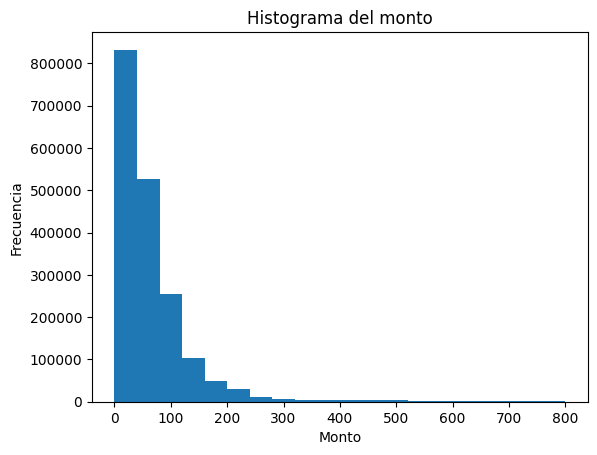

In [47]:
bin_range = (0, 800)

plt.hist(df['amt'], bins=20, range=bin_range)
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.title('Histograma del monto')
plt.show()

Gráfico de barras para la variable category

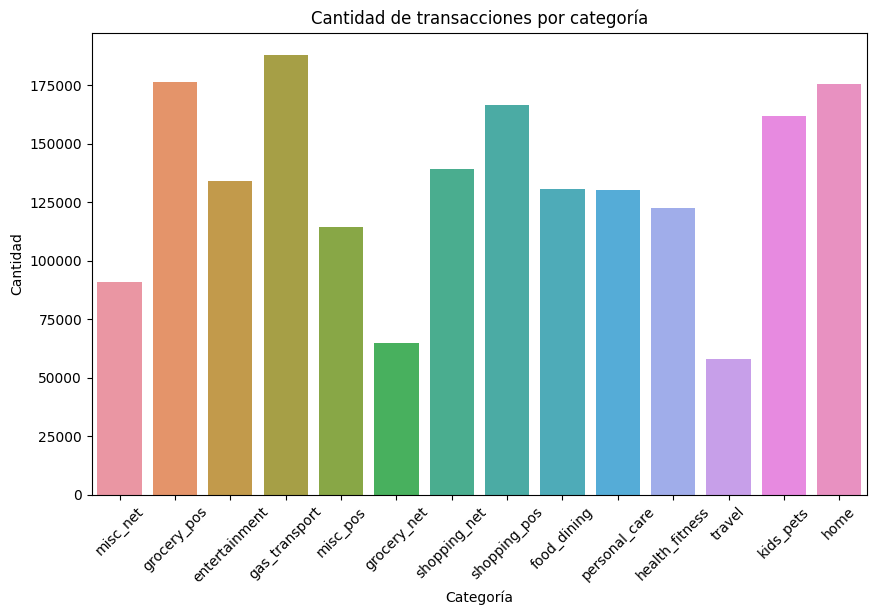

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df)
plt.xticks(rotation=45)
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.title('Cantidad de transacciones por categoría')
plt.show()

Gráfico de dispersión de 'amt' vs 'amt_year' con colores según 'is_fraud'

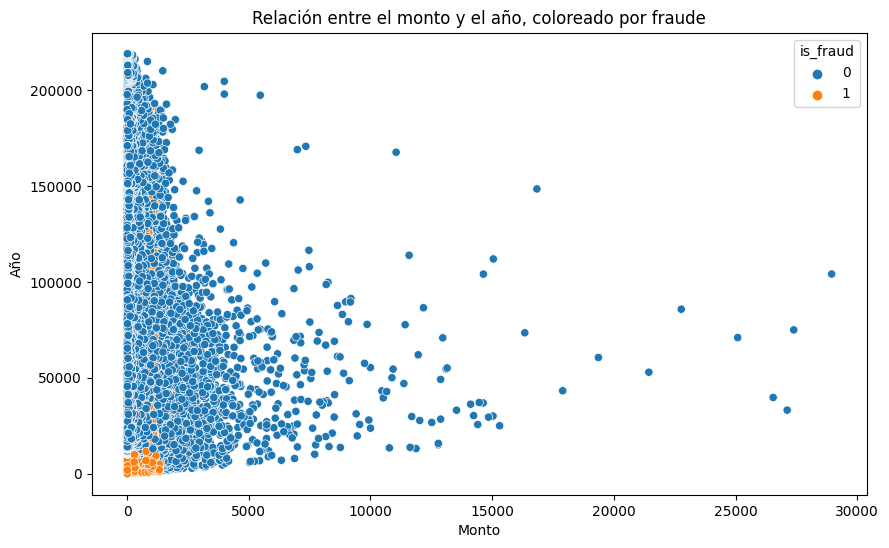

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='amt', y='amt_year', hue='is_fraud', data=df)
plt.xlabel('Monto')
plt.ylabel('Año')
plt.title('Relación entre el monto y el año, coloreado por fraude')
plt.show()

Visualizando las correlaciones del dataset

                                cc_num       amt       zip       lat   
cc_num                        1.000000  0.001826  0.041504 -0.058744  \
amt                           0.001826  1.000000  0.001979 -0.000670   
zip                           0.041504  0.001979  1.000000 -0.114554   
lat                          -0.058744 -0.000670 -0.114554  1.000000   
long                         -0.048429 -0.000735 -0.909795 -0.014744   
city_pop                     -0.009118  0.004921  0.077601 -0.154816   
unix_time                     0.000284 -0.002411  0.001017  0.000741   
merch_lat                    -0.058415 -0.000613 -0.113934  0.993582   
merch_long                   -0.048421 -0.000711 -0.908981 -0.014709   
is_fraud                     -0.001125  0.209308 -0.002190  0.002904   
amt_month                    -0.003724  0.063139  0.026919 -0.016960   
amt_year                     -0.002399  0.020724  0.029880 -0.020163   
amt_month_shopping_net_spend -0.007375  0.075108  0.019911 -0.02

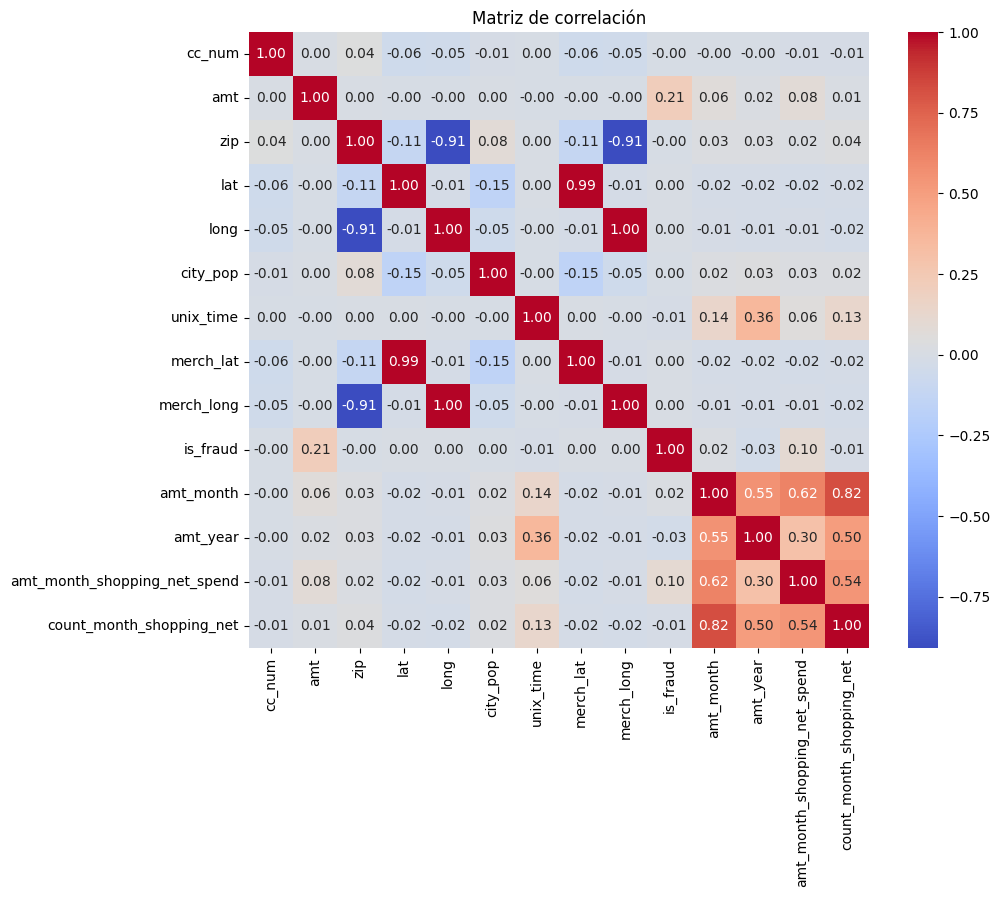

In [50]:
# Seleccionando las columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()

print(correlation_matrix)

# Graficando la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

Visualización de la distribución de las clases para verificar si hay desbalances en el dataset.

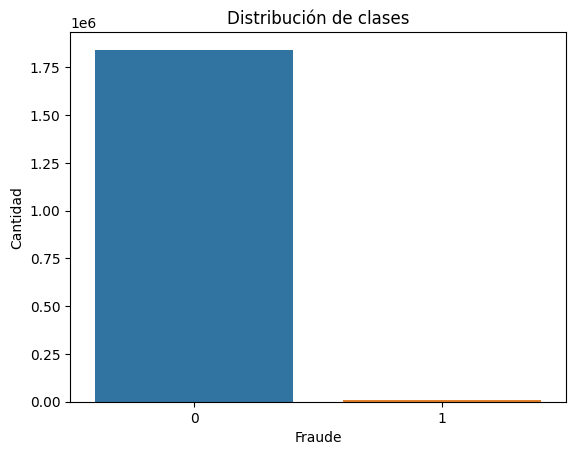

In [51]:
sns.countplot(x='is_fraud', data=df)
plt.xlabel('Fraude')
plt.ylabel('Cantidad')
plt.title('Distribución de clases')
plt.show()

Exploración de variables categóricas

Tabla de frecuencia de la variable 'merchant':
                                  Merchant  Frequency
0                        fraud_Kilback LLC       6262
1                        fraud_Cormier LLC       5246
2                         fraud_Schumm PLC       5195
3                           fraud_Kuhn LLC       5031
4                          fraud_Boyer PLC       4999
..                                     ...        ...
688    fraud_Douglas, DuBuque and McKenzie       1101
689                     fraud_Treutel-King       1098
690                 fraud_Satterfield-Lowe       1095
691     fraud_Hahn, Douglas and Schowalter       1091
692  fraud_Ritchie, Bradtke and Stiedemann       1090

[693 rows x 2 columns]


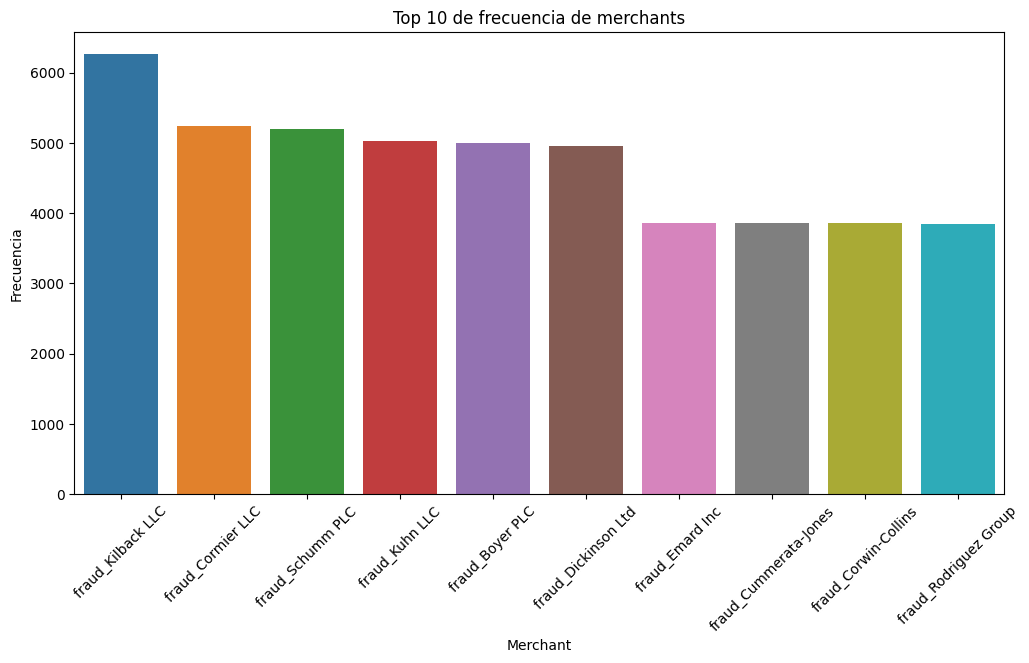

In [52]:
# Tabla de frecuencia de la variable 'merchant'
merchant_freq = df['merchant'].value_counts().reset_index()
merchant_freq.columns = ['Merchant', 'Frequency']
print("Tabla de frecuencia de la variable 'merchant':")
print(merchant_freq)

# Gráfico de barras de las 10 categorías más frecuentes
top_merchants = merchant_freq.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Merchant', y='Frequency', data=top_merchants)
plt.xlabel('Merchant')
plt.ylabel('Frecuencia')
plt.title('Top 10 de frecuencia de merchants')
plt.xticks(rotation=45)
plt.show()

Exploración de variables categóricas

Tabla de contingencia de 'category' vs 'is_fraud':
is_fraud             0     1
category                    
entertainment   133826   292
food_dining     130524   205
gas_transport   187257   772
grocery_net      64703   175
grocery_pos     173963  2228
health_fitness  122368   185
home            175195   265
kids_pets       161423   304
misc_net         89472  1182
misc_pos        113907   322
personal_care   129795   290
shopping_net    137103  2219
shopping_pos    165407  1056
travel           57800   156


<Figure size 1000x600 with 0 Axes>

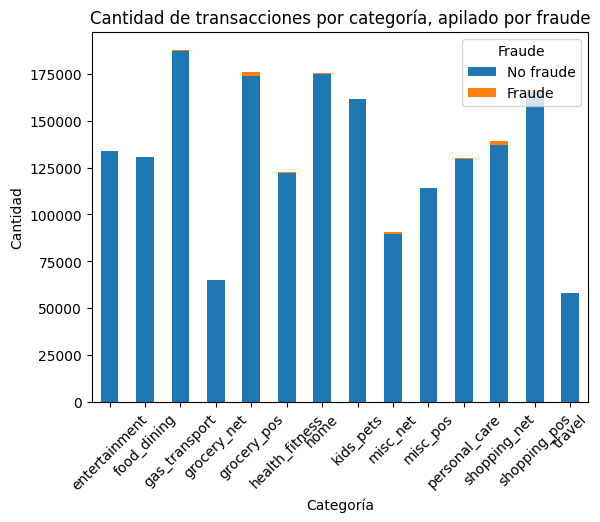

In [53]:
# Tabla de contingencia de 'category' vs 'is_fraud'
contingency_table = pd.crosstab(df['category'], df['is_fraud'])
print("Tabla de contingencia de 'category' vs 'is_fraud':")
print(contingency_table)

# Gráfico de barras apiladas de 'category' vs 'is_fraud'
plt.figure(figsize=(10, 6))
contingency_table.plot(kind='bar', stacked=True)
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.title('Cantidad de transacciones por categoría, apilado por fraude')
plt.xticks(rotation=45)
plt.legend(title='Fraude', labels=['No fraude', 'Fraude'])
plt.show()

Análisis temporal

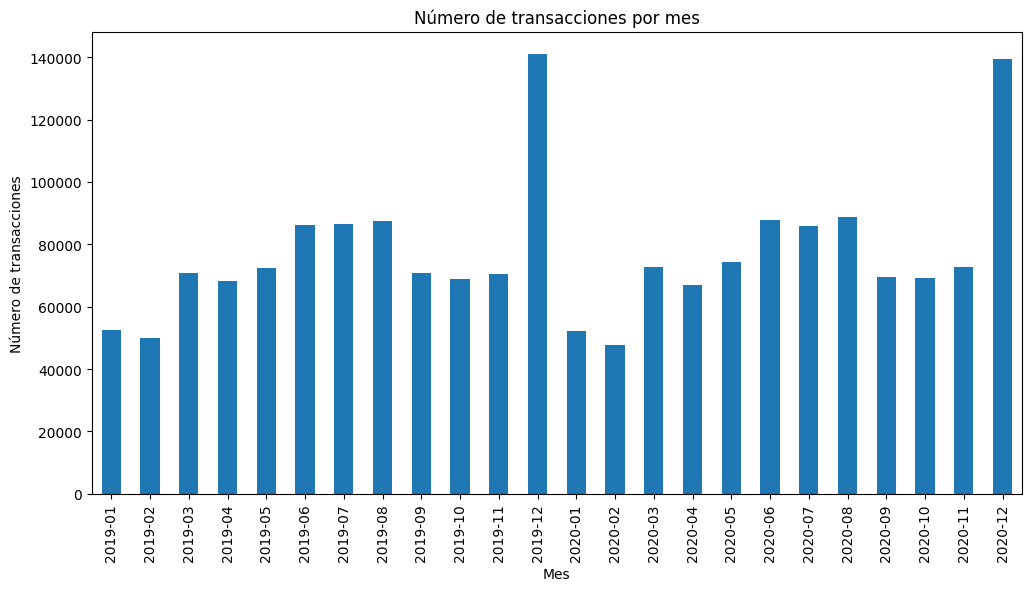

In [54]:
#Convirtiendo la variable 'trans_date_trans_time' a tipo datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Agrupando transacciones por mes y contar el número de transacciones en cada mes
transactions_by_month = df.groupby(df['trans_date_trans_time'].dt.to_period('M')).size()

# Graficando las transacciones por mes
plt.figure(figsize=(12, 6))
transactions_by_month.plot(kind='bar')
plt.xlabel('Mes')
plt.ylabel('Número de transacciones')
plt.title('Número de transacciones por mes')
plt.show()

Análisis de variables relacionadas con la geografía

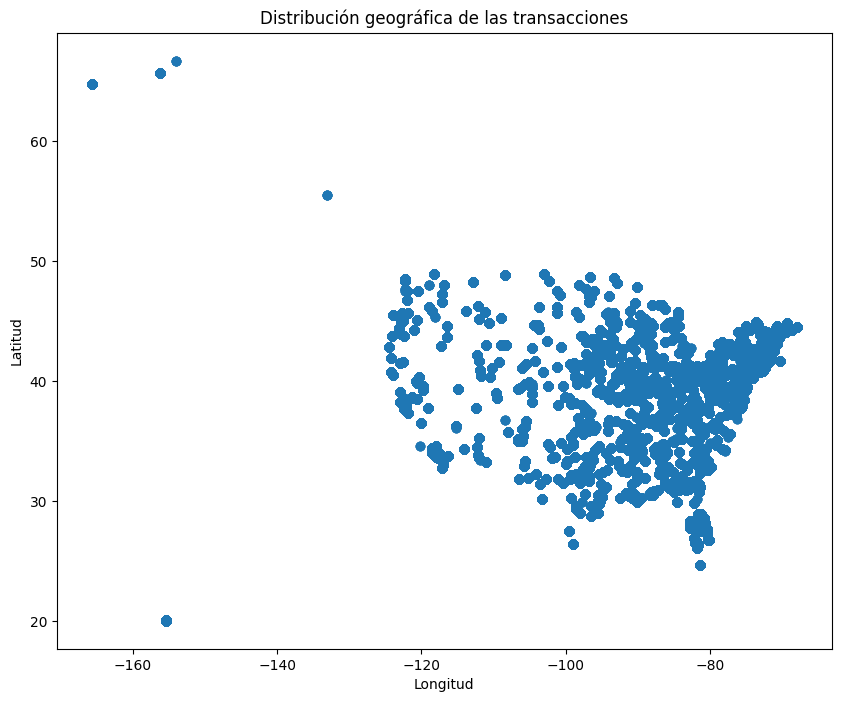

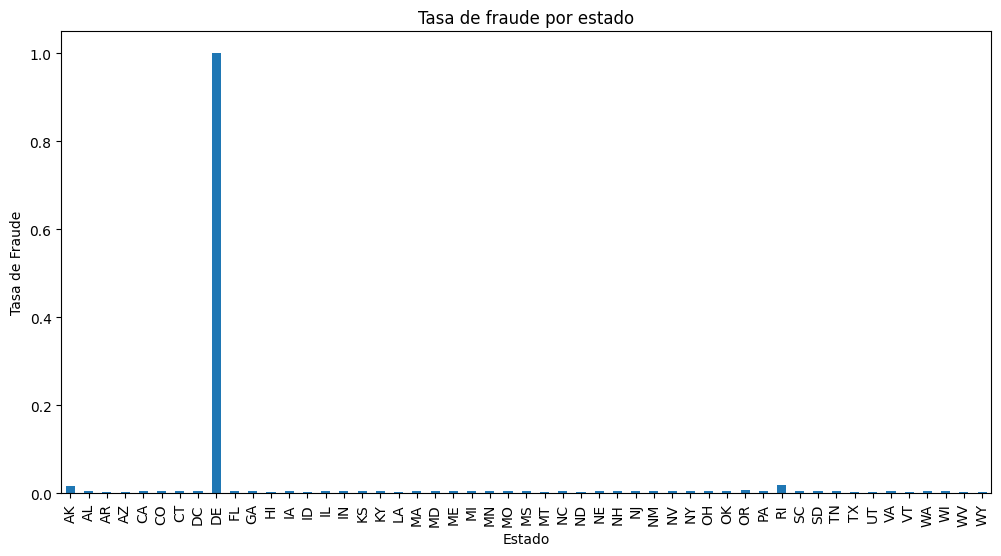

In [55]:
# Gráfico de dispersión de latitud vs longitud
plt.figure(figsize=(10, 8))
plt.scatter(df['long'], df['lat'], alpha=0.5)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribución geográfica de las transacciones')
plt.show()

# Gráfico de barras apiladas de fraude por estado
fraud_by_state = df.groupby('state')['is_fraud'].mean()
plt.figure(figsize=(12, 6))
fraud_by_state.plot(kind='bar')
plt.xlabel('Estado')
plt.ylabel('Tasa de Fraude')
plt.title('Tasa de fraude por estado')
plt.show()

Mapa con las ubicaciones mundiales

In [56]:
# # Creando un mapa mundial
# mapa_mundial = folium.Map(location=[0, 0], zoom_start=2)

# # Añadiendo un marcador para cada transacción que esté en el dataset
# for index, row in df.iterrows():
#     folium.Marker([row['lat'], row['long']], 
#                   popup=f"Fraude: {row['is_fraud']}, Monto: {row['amt']}").add_to(mapa_mundial)

# # Enseñando el mapa
# mapa_mundial

Gráfico de dispersión de "amt" vs "amt_month" con colores según "is_fraud"

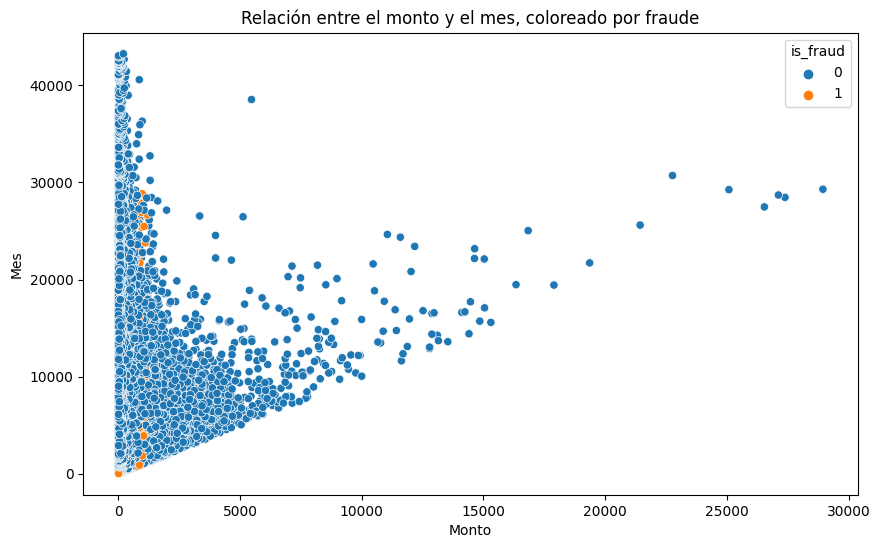

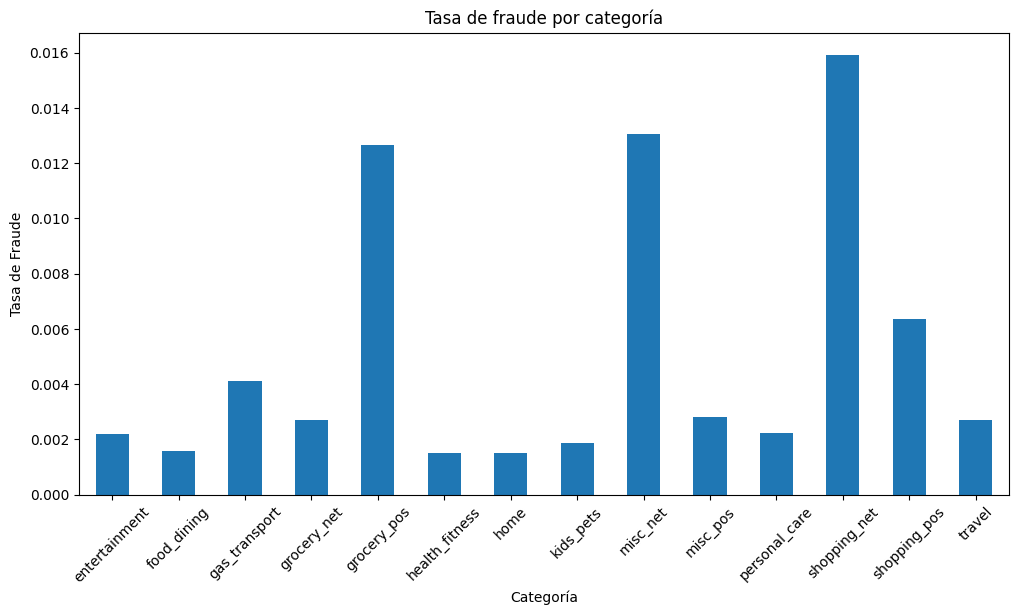

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='amt', y='amt_month', hue='is_fraud', data=df)
plt.xlabel('Monto')
plt.ylabel('Mes')
plt.title('Relación entre el monto y el mes, coloreado por fraude')
plt.show()

# Gráfico de barras apiladas de fraude por categoría
fraud_by_category = df.groupby('category')['is_fraud'].mean()
plt.figure(figsize=(12, 6))
fraud_by_category.plot(kind='bar')
plt.xlabel('Categoría')
plt.ylabel('Tasa de Fraude')
plt.title('Tasa de fraude por categoría')
plt.xticks(rotation=45)
plt.show()

In [58]:
import pandas as pd

df_procesado = pd.read_csv('../archive_new_feats/dataset_clean.csv')

df_procesado['trans_date_trans_time'] = pd.to_datetime(df_procesado['trans_date_trans_time'])

# Seleccionar las columnas relevantes para el análisis de series de tiempo
df_series_tiempo = df_procesado[['trans_date_trans_time', 'amt', 'is_fraud']]

# Configurar la columna de fecha como el índice del DataFrame
df_series_tiempo.set_index('trans_date_trans_time', inplace=True)

# Asegurarse de que los datos están ordenados por fecha
df_series_tiempo.sort_index(inplace=True)

# Mostrar las primeras filas del DataFrame
print(df_series_tiempo.head())

                          amt  is_fraud
trans_date_trans_time                  
2019-01-01 00:00:18      4.97         0
2019-01-01 00:00:44    107.23         0
2019-01-01 00:00:51    220.11         0
2019-01-01 00:01:16     45.00         0
2019-01-01 00:03:06     41.96         0


Visualización de la serie temporal de transacciones

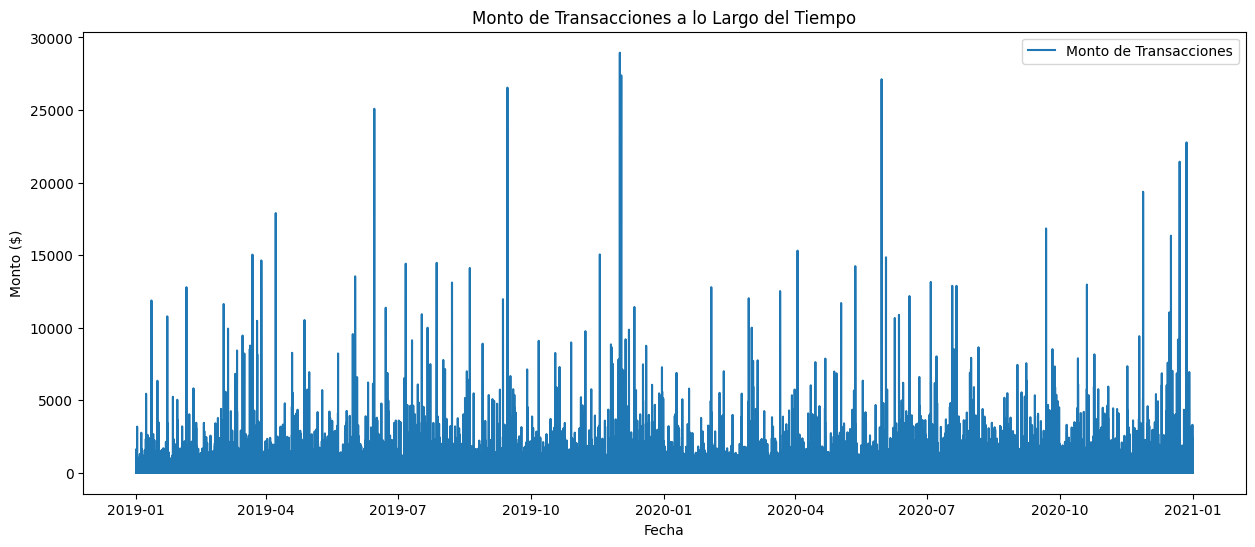

In [59]:
plt.figure(figsize=(15, 6))
plt.plot(df_series_tiempo.index, df_series_tiempo['amt'], label='Monto de Transacciones')
plt.xlabel('Fecha')
plt.ylabel('Monto ($)')
plt.title('Monto de Transacciones a lo Largo del Tiempo')
plt.legend()
plt.show()

Visualización de transacciones fraudulentas y no fraudulentas

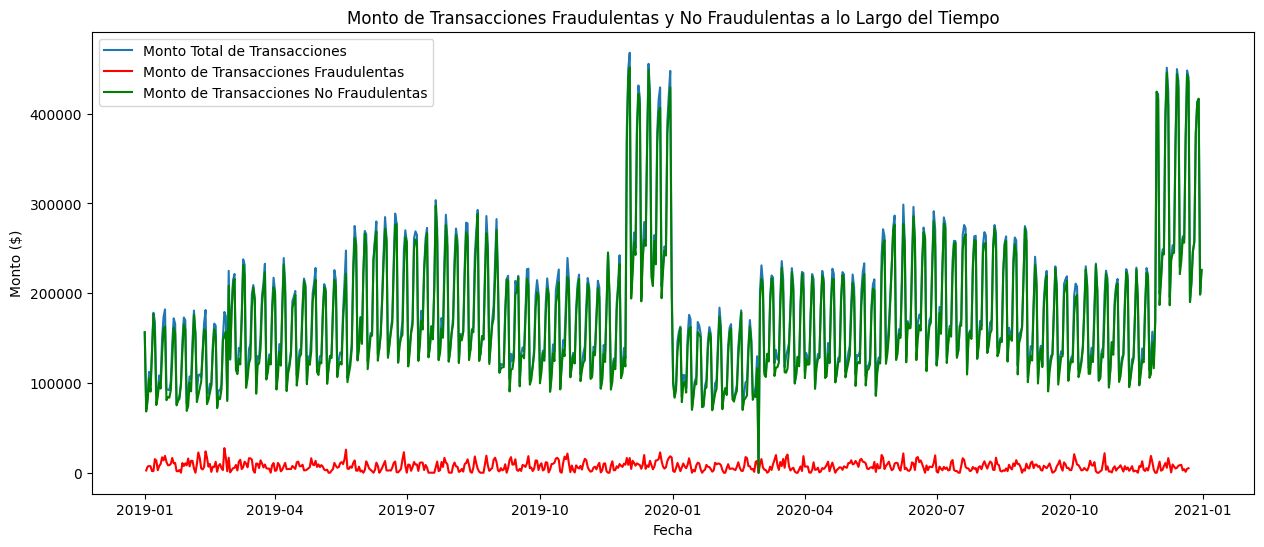

In [60]:
# Resamplear los datos para obtener sumas diarias
df_daily = df_series_tiempo.resample('D').sum()

# Separar transacciones fraudulentas y no fraudulentas
df_fraude = df_series_tiempo[df_series_tiempo['is_fraud'] == 1].resample('D').sum()
df_no_fraude = df_series_tiempo[df_series_tiempo['is_fraud'] == 0].resample('D').sum()

plt.figure(figsize=(15, 6))
plt.plot(df_daily.index, df_daily['amt'], label='Monto Total de Transacciones')
plt.plot(df_fraude.index, df_fraude['amt'], label='Monto de Transacciones Fraudulentas', color='r')
plt.plot(df_no_fraude.index, df_no_fraude['amt'], label='Monto de Transacciones No Fraudulentas', color='g')
plt.xlabel('Fecha')
plt.ylabel('Monto ($)')
plt.title('Monto de Transacciones Fraudulentas y No Fraudulentas a lo Largo del Tiempo')
plt.legend()
plt.show()

Análisis de autocorrelación

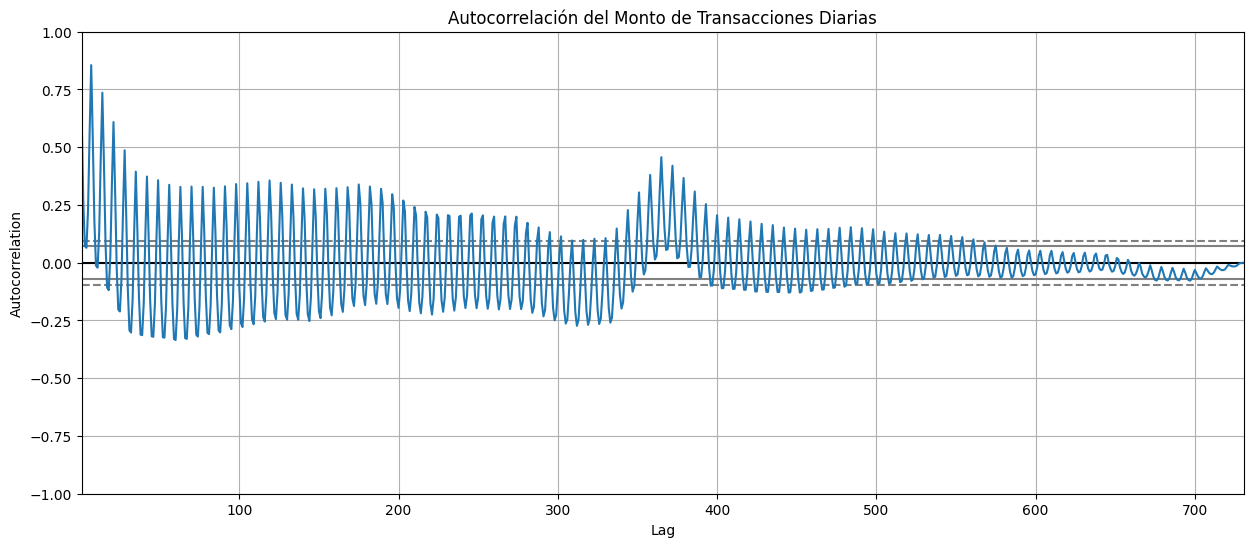

In [61]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(15, 6))
autocorrelation_plot(df_daily['amt'])
plt.title('Autocorrelación del Monto de Transacciones Diarias')
plt.show()

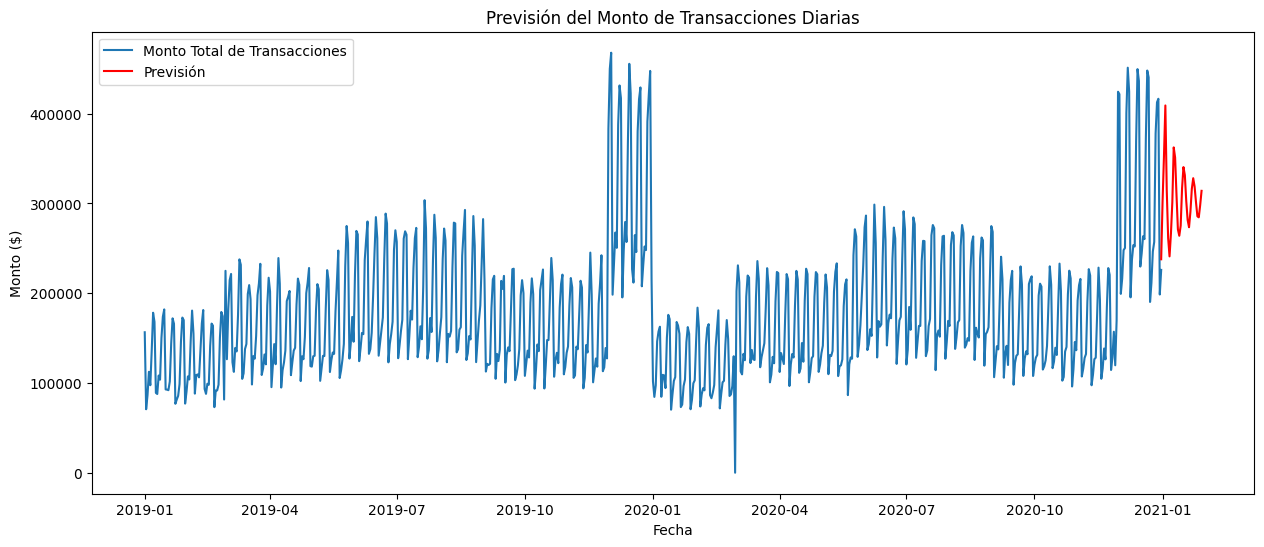

In [62]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# Ajustar el modelo ARIMA
model = ARIMA(df_daily['amt'], order=(5, 1, 0))
model_fit = model.fit()

# Hacer previsiones
forecast = model_fit.forecast(steps=30)

# Visualizar las previsiones
plt.figure(figsize=(15, 6))
plt.plot(df_daily.index, df_daily['amt'], label='Monto Total de Transacciones')
plt.plot(pd.date_range(start=df_daily.index[-1], periods=30, freq='D'), forecast, label='Previsión', color='r')
plt.xlabel('Fecha')
plt.ylabel('Monto ($)')
plt.title('Previsión del Monto de Transacciones Diarias')
plt.legend()
plt.show()

**Feature Engineering**

Creando características de tiempo

In [63]:
# Convertiendo 'trans_date_trans_time' a tipo datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Creando nuevas características de tiempo
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
df['month'] = df['trans_date_trans_time'].dt.month

Frecuencia de transacciones por cliente

In [64]:
# Calculando la frecuencia de transacciones por cliente
transaction_frequency = df.groupby('cc_num').size().reset_index(name='transaction_frequency')

# Fusionando la frecuencia de transacciones con el DataFrame original
df = pd.merge(df, transaction_frequency, on='cc_num', how='left')

Calculando los montos promedio por transacción

In [65]:
# Calculando el monto promedio de transacción por cliente
average_transaction_amount = df.groupby('cc_num')['amt'].mean().reset_index(name='average_transaction_amount')

# Fusionando el monto promedio de transacción con el DataFrame original
df = pd.merge(df, average_transaction_amount, on='cc_num', how='left')

Viendo que comercios visitó el dueño de la tarjeta

In [66]:
# Calculando la diversidad de comercios visitados por cada tarjetahabiente
unique_merchants_visited = df.groupby('cc_num')['merchant'].nunique().reset_index(name='unique_merchants_visited')

# Fusionando la diversidad de comercios visitados con el DataFrame original
df = pd.merge(df, unique_merchants_visited, on='cc_num', how='left')

Condition fist time at merchant

In [93]:
def is_first_time_transaction_at_merchant(group):
    """
    Determine if a transaction is the first time at a merchant for each credit card.

    Parameters:
    - group (DataFrame): A group of transactions for a specific credit card.

    Returns:
    DataFrame: The input DataFrame with an additional column 'first_time_at_merchant' indicating
    whether each transaction is the first time at the merchant for each credit card.
    """
    group['first_time_at_merchant'] = ~group.duplicated(subset=['merchant', 'cc_num'])
    return group

In [ ]:
df = df.groupby('cc_num').apply(is_first_time_transaction_at_merchant).reset_index(drop=True)

Guardando el dataset

In [67]:
ruta = "../archive_new_feats/"

df.to_csv(ruta + 'dataset_clean.csv', index=False)

Aplicando el balance de clases en el nuevo dataset

In [68]:
df_procesado = pd.read_csv('../archive_new_feats/dataset_clean.csv')

Aplicando el modelo para el primer semestre de 2019

Aplicando el balance de clases y la normalización para los datos del primer semestre de 2019

Distribución de clases antes de SMOTE: {0: 103065, 1: 933}
Distribución de clases después de SMOTE: {0: 103065, 1: 20613}


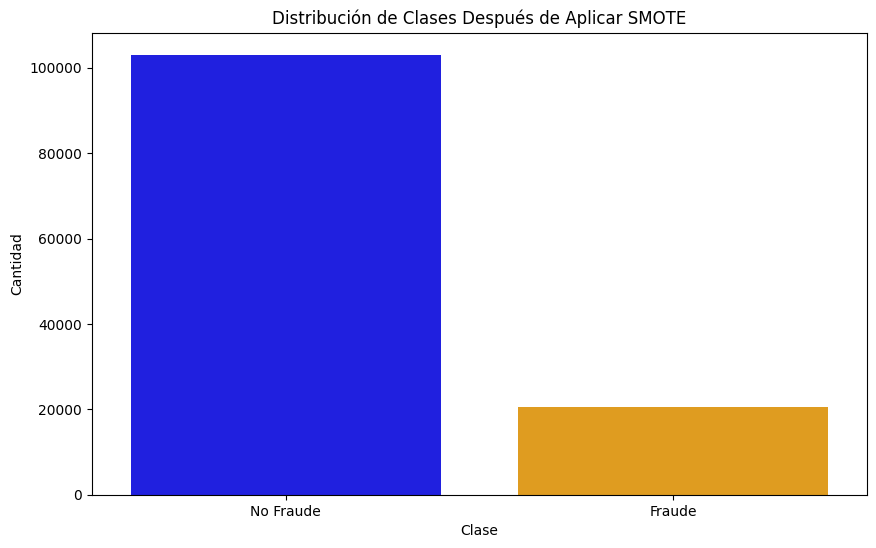

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

df_procesado['trans_date_trans_time'] = pd.to_datetime(df_procesado['trans_date_trans_time'])

# Seleccionando los datos correspondientes al primer semestre del año 2019
first_half_2019_data = df_procesado[(df_procesado['trans_date_trans_time'].dt.year == 2019) & 
                                    (df_procesado['trans_date_trans_time'].dt.month <= 3)]

# Separando características y variable objetivo
X = first_half_2019_data.drop(columns=['is_fraud', "trans_date_trans_time"])
X = X.select_dtypes(include=['float64', 'int64'])  # Seleccionando solo las columnas numéricas
y = first_half_2019_data['is_fraud']  # Variable objetivo

# Normalizando las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Divide el conjunto de datos en Train y Test
X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Divide el conjunto de entrenamiento y desarrollo (TrainDev) en Train y Dev
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, test_size=0.25, random_state=42)

# Convertir los datos a arrays NumPy
X_train, y_train = np.array(X_train), np.array(y_train)

# Contar el número de muestras en cada clase en el conjunto de entrenamiento
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))
print(f"Distribución de clases antes de SMOTE: {class_distribution}")

# Crear el objeto SMOTE con la estrategia de muestreo específica
n_minority_samples = class_distribution[1]
n_majority_samples = class_distribution[0]
desired_minority_samples = n_majority_samples // 5  # Proporción 1:5

# Crear el objeto SMOTE
sampling_strategy = {0: n_majority_samples, 1: desired_minority_samples}

smote = SMOTE(sampling_strategy=sampling_strategy)

# Ajustando y aplicando el sobremuestreo
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verificando la nueva distribución de clases
unique_res, counts_res = np.unique(y_train_res, return_counts=True)
class_distribution_res = dict(zip(unique_res, counts_res))
print(f"Distribución de clases después de SMOTE: {class_distribution_res}")

# Gráfico de barras de la variable objetivo después de SMOTE
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train_res, palette=['blue', 'orange'])
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.title('Distribución de Clases Después de Aplicar SMOTE')
plt.xticks([0, 1], ['No Fraude', 'Fraude'])
plt.show()

**Implementación práctica**

Redes neuronales

Epoch 1/5
484/484 [==============================] - 15s 16ms/step - loss: 0.1584 - accuracy: 0.9397 - val_loss: 0.0601 - val_accuracy: 0.9777
Epoch 2/5
484/484 [==============================] - 6s 11ms/step - loss: 0.0647 - accuracy: 0.9760 - val_loss: 0.0387 - val_accuracy: 0.9863
Epoch 3/5
484/484 [==============================] - 5s 11ms/step - loss: 0.0457 - accuracy: 0.9836 - val_loss: 0.0270 - val_accuracy: 0.9911
Epoch 4/5
484/484 [==============================] - 5s 11ms/step - loss: 0.0336 - accuracy: 0.9878 - val_loss: 0.0292 - val_accuracy: 0.9916
Epoch 5/5
1084/1084 [==============================] - 6s 5ms/step - loss: 0.0239 - accuracy: 0.9937
Test accuracy: 0.9936537146568298
1084/1084 [==============================] - 6s 5ms/step
AUC: 0.971827636745385


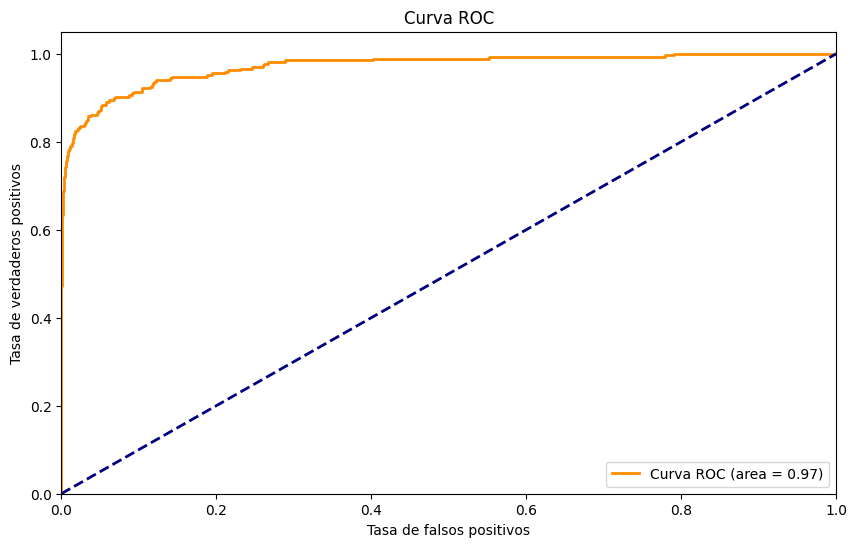

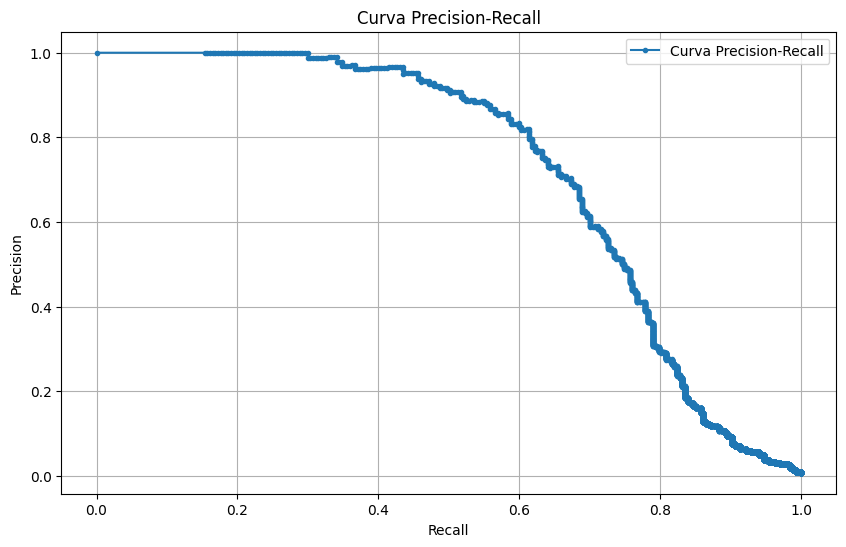

Mejor umbral: 0.9155390858650208
Mejor F1-score: 0.7023554603854388
Precision en el mejor umbral: 0.82
Recall en el mejor umbral: 0.6142322097378277
Precision con umbral óptimo: 0.8190954773869347
Recall con umbral óptimo: 0.6104868913857678
F1-score con umbral óptimo: 0.6995708154506438
Matriz de Confusión:
 [[34363    36]
 [  104   163]]


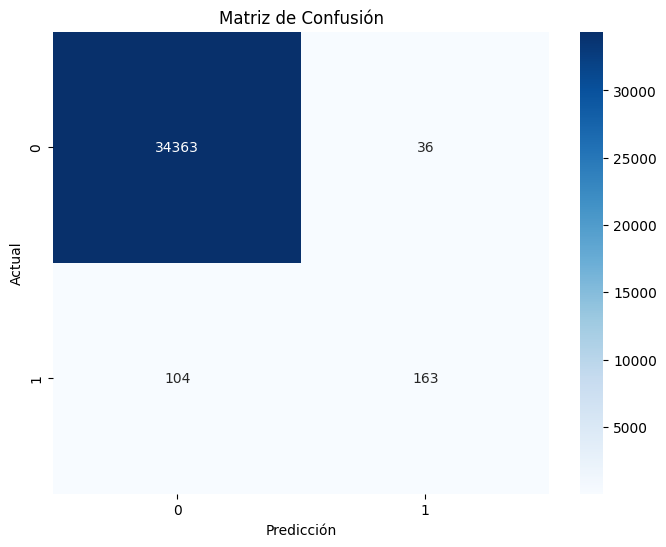

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Modelo guardado en "modelo_entrenado_trimestre1_2019.h5"


In [70]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, recall_score, f1_score, precision_score, precision_recall_curve, confusion_matrix
import seaborn as sns

# Definiendo la arquitectura de la red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_res.shape[1],)),  # Primera capa oculta
    tf.keras.layers.Dense(64, activation='relu'),  # Segunda capa oculta, misma dimensión
    tf.keras.layers.Dense(64, activation='relu'),  # Tercera capa oculta, misma dimensión
    tf.keras.layers.Dense(32, activation='relu'),  # Cuarta capa oculta, reducción de dimensión
    tf.keras.layers.Dense(32, activation='relu'),  # Quinta capa oculta, misma dimensión
    tf.keras.layers.Dense(1, activation='sigmoid')  # Capa de salida
])

# Compilando el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenando el modelo
history = model.fit(X_train_res, y_train_res, epochs=5, batch_size=256, validation_data=(X_dev, y_dev))

# Evaluando el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Predeciendo probabilidades en el conjunto de prueba
y_pred_prob = model.predict(X_test)

# Calculando la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

# Gráfica de la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Calculando y graficando la curva Precision-Recall
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label='Curva Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend()
plt.grid(True)
plt.show()

# Encontrando el umbral que maximiza el F1-score
f1_scores = 2 * (precision * recall) / (precision + recall)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds_pr[best_idx]
best_f1 = f1_scores[best_idx]
best_precision = precision[best_idx]
best_recall = recall[best_idx]

print(f'Mejor umbral: {best_threshold}')
print(f'Mejor F1-score: {best_f1}')
print(f'Precision en el mejor umbral: {best_precision}')
print(f'Recall en el mejor umbral: {best_recall}')

# Convertiendo probabilidades en predicciones de clases usando el umbral óptimo
y_pred_optimal = (y_pred_prob > best_threshold).astype(int)

# Calculando precision, recall y F1-score con el umbral óptimo
optimal_precision = precision_score(y_test, y_pred_optimal)
optimal_recall = recall_score(y_test, y_pred_optimal)
optimal_f1 = f1_score(y_test, y_pred_optimal)

print(f'Precision con umbral óptimo: {optimal_precision}')
print(f'Recall con umbral óptimo: {optimal_recall}')
print(f'F1-score con umbral óptimo: {optimal_f1}')

# Calculando la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_optimal)
print('Matriz de Confusión:\n', conf_matrix)

# Graficando la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

# Guardando el modelo entrenado en un archivo
model.save('modelo_entrenado_trimestre1_2019.h5')
print('Modelo guardado en "modelo_entrenado_trimestre1_2019.h5"')

Random Forest

Accuracy: 0.9966249350949057
AUC: 0.9751818083728374


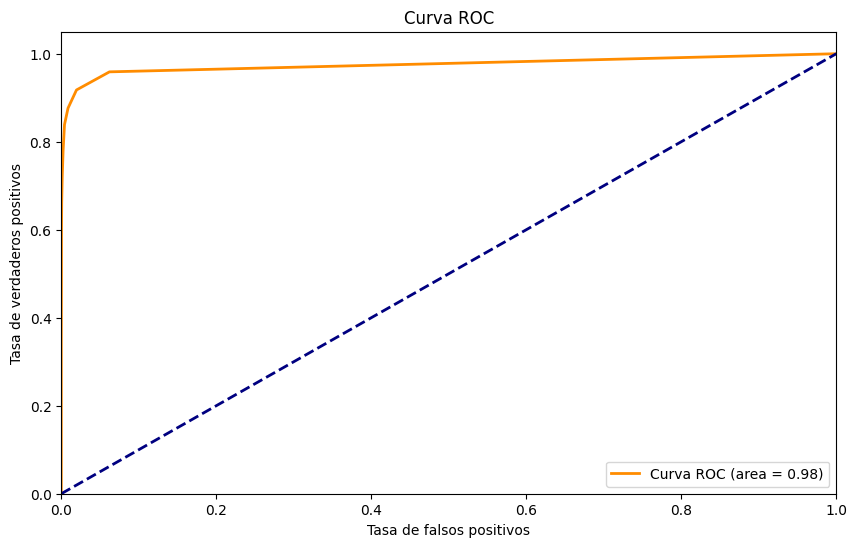

Recall: 0.7191011235955056
F1-score: 0.7664670658682635
Precision: 0.8205128205128205
Matriz de Confusión:
 [[34357    42]
 [   75   192]]


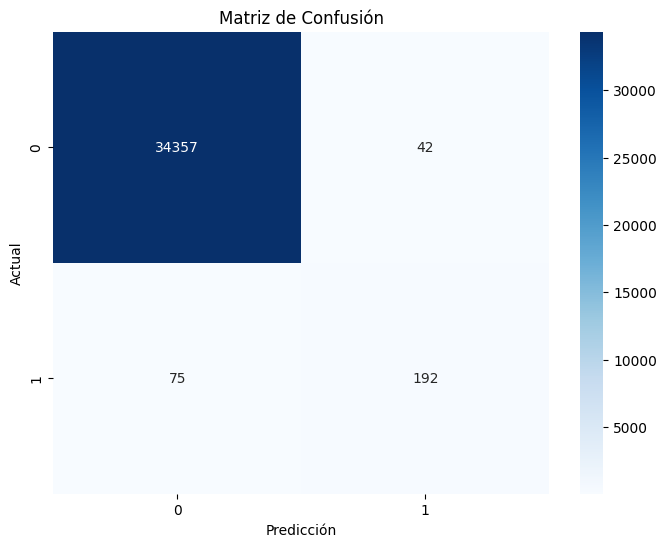

Modelo guardado en "random_forest_model_trimestre1_2019.joblib"


In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, recall_score, f1_score, accuracy_score, precision_score, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Inicializando el clasificador RandomForest
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

# Entrenando el clasificador
rf_classifier.fit(X_train_res, y_train_res)

# Predeciendo clases en el conjunto de prueba
y_pred = rf_classifier.predict(X_test)

# Calculando el accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Predeciendo probabilidades en el conjunto de prueba
y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Calculando la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

# Gráfica de la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Calculando el recall y el F1-score
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Recall:', recall)
print('F1-score:', f1)

# Calculando el precision.
precision = precision_score(y_test, y_pred)
print('Precision:', precision)

# Calculando la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:\n', conf_matrix)

# Graficando la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

# Guardando el modelo entrenado en un archivo
joblib.dump(rf_classifier, 'random_forest_model_trimestre1_2019.joblib')
print('Modelo guardado en "random_forest_model_trimestre1_2019.joblib"')

Haciendo el reentrenamiento con el segundo trimestre de 2019

Distribución de clases antes de SMOTE: {0: 135312, 1: 692}
Distribución de clases después de SMOTE: {0: 135312, 1: 27062}


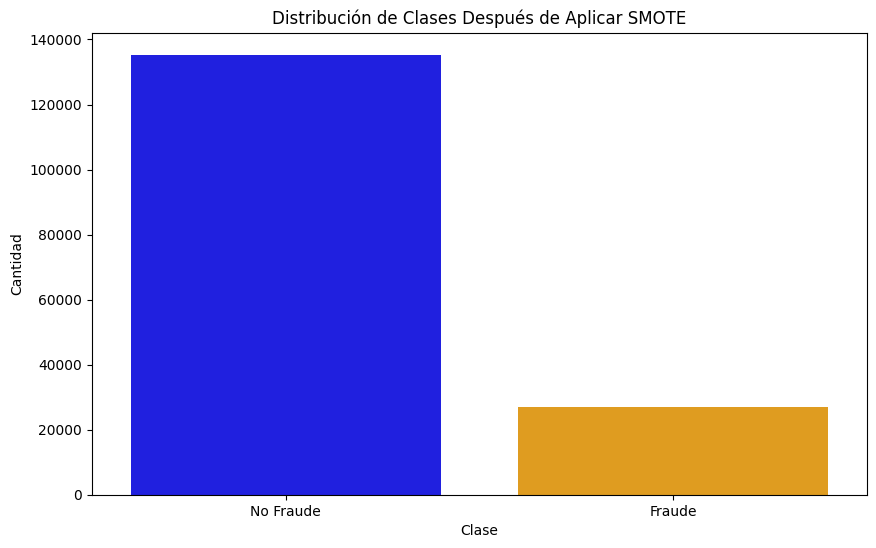

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

df_procesado['trans_date_trans_time'] = pd.to_datetime(df_procesado['trans_date_trans_time'])

# Seleccionando los datos correspondientes al segundo trimestre del año 2019
second_quarter_2019_data = df_procesado[(df_procesado['trans_date_trans_time'].dt.year == 2019) & 
                                        (df_procesado['trans_date_trans_time'].dt.month >= 4) & 
                                        (df_procesado['trans_date_trans_time'].dt.month <= 6)]

# Separando características y variable objetivo
X = second_quarter_2019_data.drop(columns=['is_fraud', "trans_date_trans_time"])
X = X.select_dtypes(include=['float64', 'int64'])  # Seleccionando solo las columnas numéricas
y = second_quarter_2019_data['is_fraud']  # Variable objetivo

# Normalizando las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Divide el conjunto de datos en Train y Test
X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Divide el conjunto de entrenamiento y desarrollo (TrainDev) en Train y Dev
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, test_size=0.25, random_state=42)

# Convertir los datos a arrays NumPy
X_train, y_train = np.array(X_train), np.array(y_train)

# Contar el número de muestras en cada clase en el conjunto de entrenamiento
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))
print(f"Distribución de clases antes de SMOTE: {class_distribution}")

# Crear el objeto SMOTE con la estrategia de muestreo específica
n_minority_samples = class_distribution[1]
n_majority_samples = class_distribution[0]
desired_minority_samples = n_majority_samples // 5  # Proporción 1:5

# Crear el objeto SMOTE
sampling_strategy = {0: n_majority_samples, 1: desired_minority_samples}

smote = SMOTE(sampling_strategy=sampling_strategy)

# Ajustando y aplicando el sobremuestreo
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verificando la nueva distribución de clases
unique_res, counts_res = np.unique(y_train_res, return_counts=True)
class_distribution_res = dict(zip(unique_res, counts_res))
print(f"Distribución de clases después de SMOTE: {class_distribution_res}")

# Gráfico de barras de la variable objetivo después de SMOTE
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train_res, palette=['blue', 'orange'])
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.title('Distribución de Clases Después de Aplicar SMOTE')
plt.xticks([0, 1], ['No Fraude', 'Fraude'])
plt.show()


Redes neuronales

Epoch 1/5
635/635 [==============================] - 12s 13ms/step - loss: 0.0855 - accuracy: 0.9710 - val_loss: 0.0227 - val_accuracy: 0.9926
Epoch 2/5
635/635 [==============================] - 7s 12ms/step - loss: 0.0327 - accuracy: 0.9885 - val_loss: 0.0198 - val_accuracy: 0.9936
Epoch 3/5
635/635 [==============================] - 6s 9ms/step - loss: 0.0210 - accuracy: 0.9927 - val_loss: 0.0212 - val_accuracy: 0.9933
Epoch 4/5
635/635 [==============================] - 6s 9ms/step - loss: 0.0159 - accuracy: 0.9945 - val_loss: 0.0154 - val_accuracy: 0.9956
Epoch 5/5
1417/1417 [==============================] - 9s 6ms/step - loss: 0.0152 - accuracy: 0.9962
Test accuracy: 0.9961839914321899
1417/1417 [==============================] - 7s 5ms/step
AUC: 0.9857609206356983


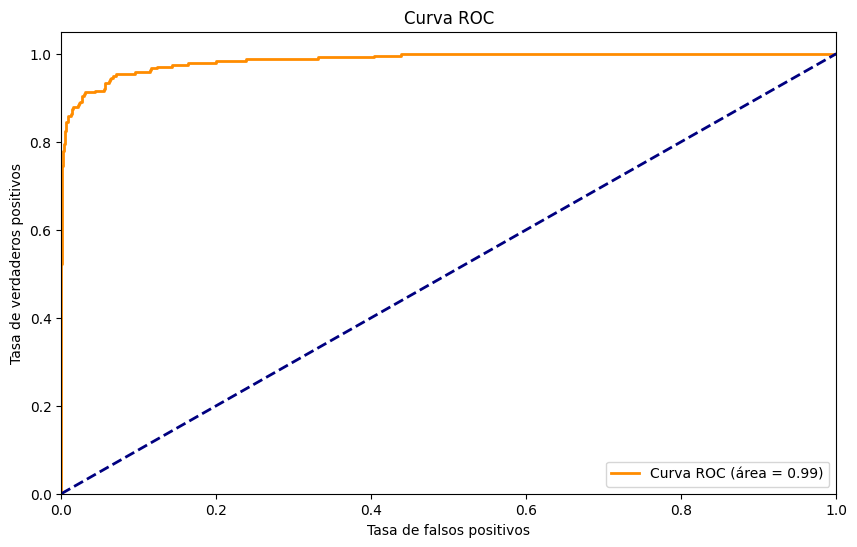

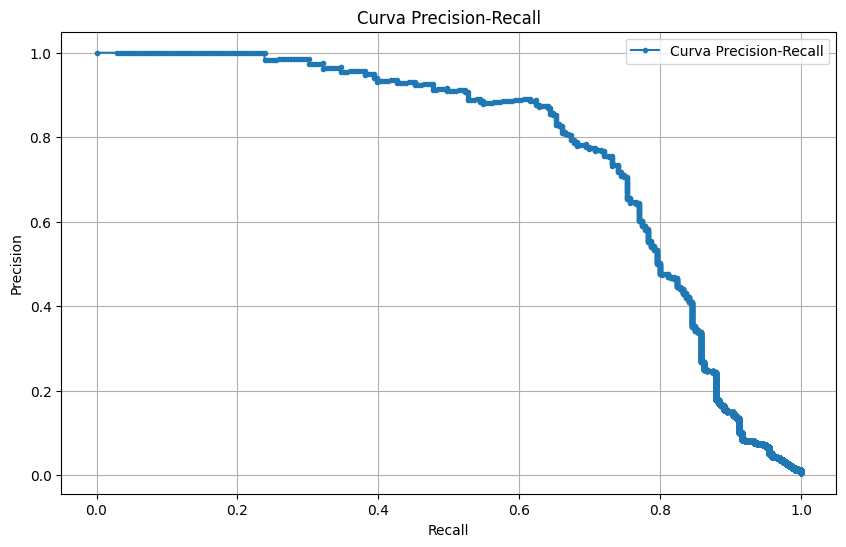

Mejor umbral: 0.8534119129180908
Mejor F1-score: 0.743099787685775
Precisión en el mejor umbral: 0.7543103448275862
Recall en el mejor umbral: 0.7322175732217573
Precisión con umbral óptimo: 0.7532467532467533
Recall con umbral óptimo: 0.7280334728033473
F1-score con umbral óptimo: 0.7404255319148936
Matriz de Confusión:
 [[45039    57]
 [   65   174]]


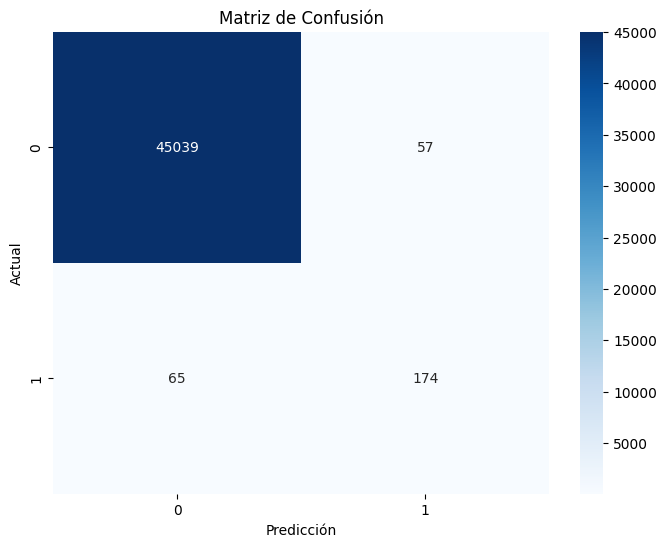

Modelo actualizado guardado en "modelo_entrenado_trimestre2_2019.h5"


c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [73]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, recall_score, f1_score, precision_score, precision_recall_curve, confusion_matrix
import seaborn as sns

# Cargando el modelo entrenado y continuando con su entrenamiento.
model = tf.keras.models.load_model('modelo_entrenado_trimestre1_2019.h5')

history = model.fit(X_train_res, y_train_res, epochs=5, batch_size=256, validation_data=(X_dev, y_dev))

# Evaluando el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Predeciendo probabilidades en el conjunto de prueba
y_pred_prob = model.predict(X_test)

# Convertiendo probabilidades en predicciones de clases usando un umbral inicial de 0.5
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculando la curva ROC, el área bajo la curva (AUC) y graficando.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Calculando y graficando la curva Precision-Recall
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label='Curva Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend()
plt.grid(True)
plt.show()

# Encontrando el umbral que maximiza el F1-score
f1_scores = 2 * (precision * recall) / (precision + recall)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds_pr[best_idx]
best_f1 = f1_scores[best_idx]
best_precision = precision[best_idx]
best_recall = recall[best_idx]

print(f'Mejor umbral: {best_threshold}')
print(f'Mejor F1-score: {best_f1}')
print(f'Precisión en el mejor umbral: {best_precision}')
print(f'Recall en el mejor umbral: {best_recall}')

# Convertiendo probabilidades en predicciones de clases usando el umbral óptimo
y_pred_optimal = (y_pred_prob > best_threshold).astype(int)

# Calcular precision, recall y F1-score con el umbral óptimo
optimal_precision = precision_score(y_test, y_pred_optimal)
optimal_recall = recall_score(y_test, y_pred_optimal)
optimal_f1 = f1_score(y_test, y_pred_optimal)

print(f'Precisión con umbral óptimo: {optimal_precision}')
print(f'Recall con umbral óptimo: {optimal_recall}')
print(f'F1-score con umbral óptimo: {optimal_f1}')

# Calculando la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_optimal)
print('Matriz de Confusión:\n', conf_matrix)

# Graficando la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

# Guardando el modelo actualizado
model.save('modelo_entrenado_trimestre2_2019.h5')
print('Modelo actualizado guardado en "modelo_entrenado_trimestre2_2019.h5"')

Random Forest

ROC-AUC: 0.9714109666927199


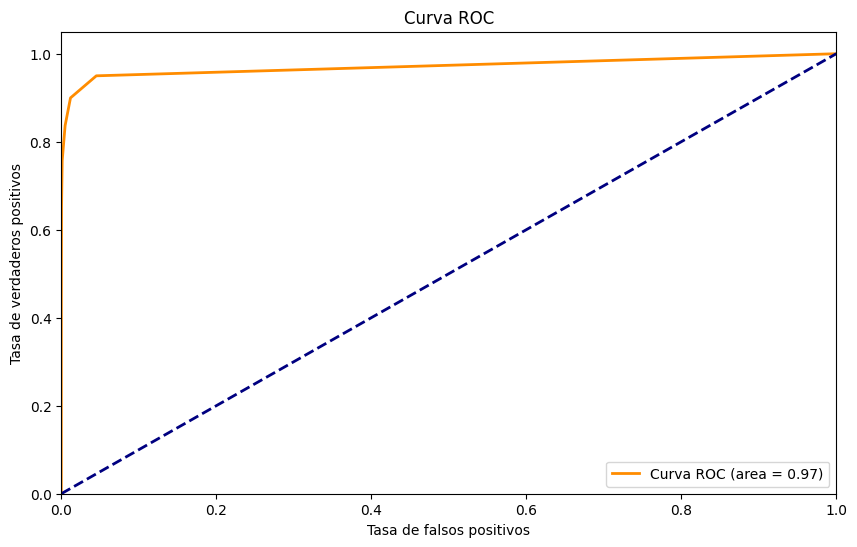

Accuracy: 0.9977280247049741
Precisión: 0.8469387755102041
Recall: 0.694560669456067
F1-score: 0.7632183908045977
Matriz de Confusión:
 [[45066    30]
 [   73   166]]


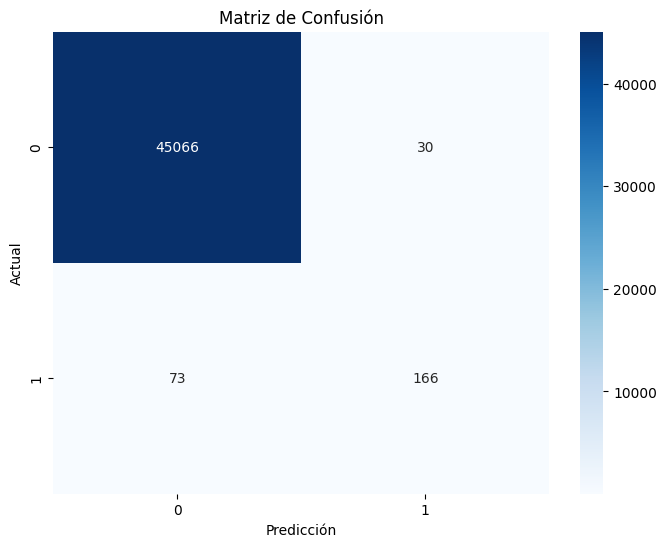

['random_forest_model_trimestre2_2019.joblib']

In [74]:
import joblib
from sklearn.metrics import roc_auc_score, recall_score, f1_score, precision_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargando el modelo
rf_classifier = joblib.load('random_forest_model_trimestre1_2019.joblib')

# Entrenando el modelo
rf_classifier.fit(X_train_res, y_train_res)

# Predeciendo probabilidades para la clase positiva
y_pred_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]

# Predeciendo clases
y_pred_rf = rf_classifier.predict(X_test)

# Calculando ROC-AUC
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
print('ROC-AUC:', roc_auc_rf)

# Gráfica de la curva ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Curva ROC (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Calculando el accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print('Accuracy:', accuracy)

# Calculando Precisión, Recall y F1-score
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print('Precisión:', precision_rf)
print('Recall:', recall_rf)
print('F1-score:', f1_rf)

# Calculando la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print('Matriz de Confusión:\n', conf_matrix)

# Graficando la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

# Guardando el modelo actualizado
joblib.dump(rf_classifier, 'random_forest_model_trimestre2_2019.joblib')

Haciendo el reentrenamiento con el tercer trimestre de 2019

Distribución de clases antes de SMOTE: {0: 146069, 1: 694}
Distribución de clases después de SMOTE: {0: 146069, 1: 29213}


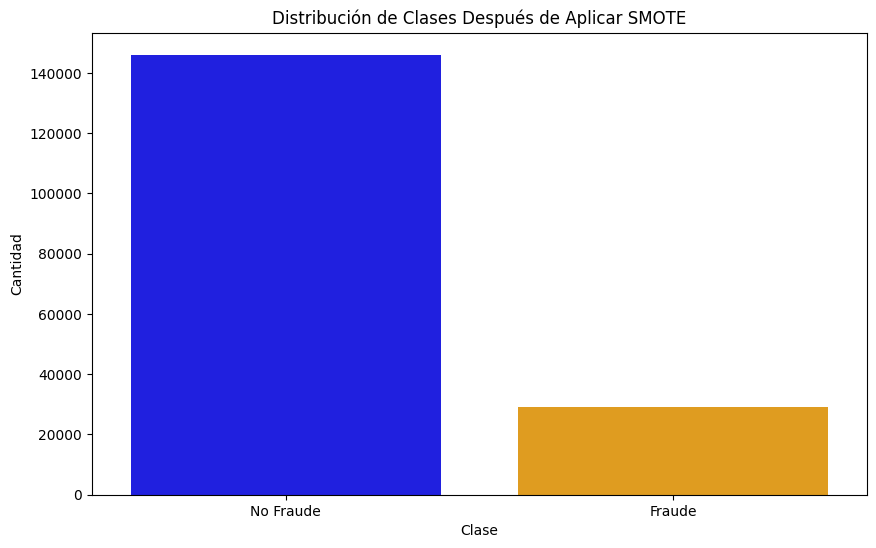

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

df_procesado['trans_date_trans_time'] = pd.to_datetime(df_procesado['trans_date_trans_time'])

# Seleccionando los datos correspondientes al tercer trimestre del año 2019
third_quarter_2019_data = df_procesado[(df_procesado['trans_date_trans_time'].dt.year == 2019) & 
                                       (df_procesado['trans_date_trans_time'].dt.month >= 7) & 
                                       (df_procesado['trans_date_trans_time'].dt.month <= 9)]

# Separando características y variable objetivo
X = third_quarter_2019_data.drop(columns=['is_fraud', "trans_date_trans_time"])
X = X.select_dtypes(include=['float64', 'int64'])  # Seleccionando solo las columnas numéricas
y = third_quarter_2019_data['is_fraud']  # Variable objetivo

# Normalizando las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Divide el conjunto de datos en Train y Test
X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Divide el conjunto de entrenamiento y desarrollo (TrainDev) en Train y Dev
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, test_size=0.25, random_state=42)

# Convertir los datos a arrays NumPy
X_train, y_train = np.array(X_train), np.array(y_train)

# Contar el número de muestras en cada clase en el conjunto de entrenamiento
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))
print(f"Distribución de clases antes de SMOTE: {class_distribution}")

# Crear el objeto SMOTE con la estrategia de muestreo específica
n_minority_samples = class_distribution[1]
n_majority_samples = class_distribution[0]
desired_minority_samples = n_majority_samples // 5  # Proporción 1:5

# Crear el objeto SMOTE
sampling_strategy = {0: n_majority_samples, 1: desired_minority_samples}

smote = SMOTE(sampling_strategy=sampling_strategy)

# Ajustando y aplicando el sobremuestreo
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verificando la nueva distribución de clases
unique_res, counts_res = np.unique(y_train_res, return_counts=True)
class_distribution_res = dict(zip(unique_res, counts_res))
print(f"Distribución de clases después de SMOTE: {class_distribution_res}")

# Gráfico de barras de la variable objetivo después de SMOTE
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train_res, palette=['blue', 'orange'])
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.title('Distribución de Clases Después de Aplicar SMOTE')
plt.xticks([0, 1], ['No Fraude', 'Fraude'])
plt.show()

Redes neuronales

Epoch 1/5
685/685 [==============================] - 10s 11ms/step - loss: 0.0657 - accuracy: 0.9774 - val_loss: 0.0251 - val_accuracy: 0.9917
Epoch 2/5
685/685 [==============================] - 7s 10ms/step - loss: 0.0233 - accuracy: 0.9921 - val_loss: 0.0213 - val_accuracy: 0.9943
Epoch 3/5
685/685 [==============================] - 7s 10ms/step - loss: 0.0167 - accuracy: 0.9946 - val_loss: 0.0241 - val_accuracy: 0.9936
Epoch 4/5
685/685 [==============================] - 6s 9ms/step - loss: 0.0116 - accuracy: 0.9963 - val_loss: 0.0233 - val_accuracy: 0.9950
Epoch 5/5
1529/1529 [==============================] - 6s 4ms/step - loss: 0.0190 - accuracy: 0.9953
Test accuracy: 0.9953190684318542
1529/1529 [==============================] - 6s 4ms/step
AUC: 0.9766997046763125


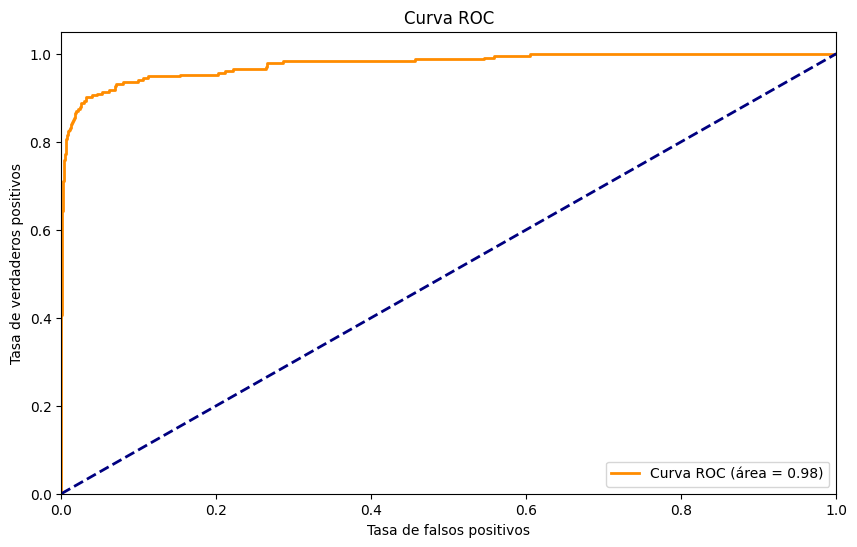

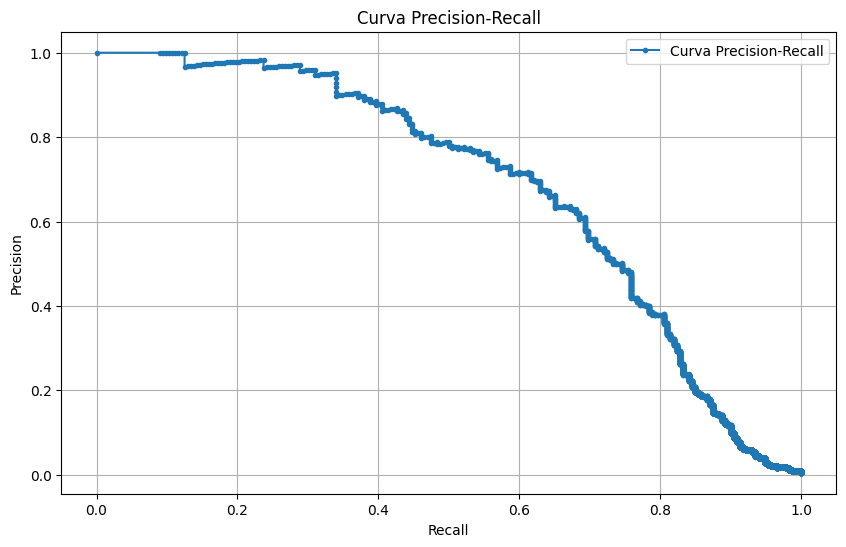

Mejor umbral: 0.9376614689826965
Mejor F1-score: 0.662037037037037
Precisión en el mejor umbral: 0.715
Recall en el mejor umbral: 0.6163793103448276
Precisión con umbral óptimo: 0.7135678391959799
Recall con umbral óptimo: 0.6120689655172413
F1-score con umbral óptimo: 0.6589327146171694
Matriz de Confusión:
 [[48633    57]
 [   90   142]]


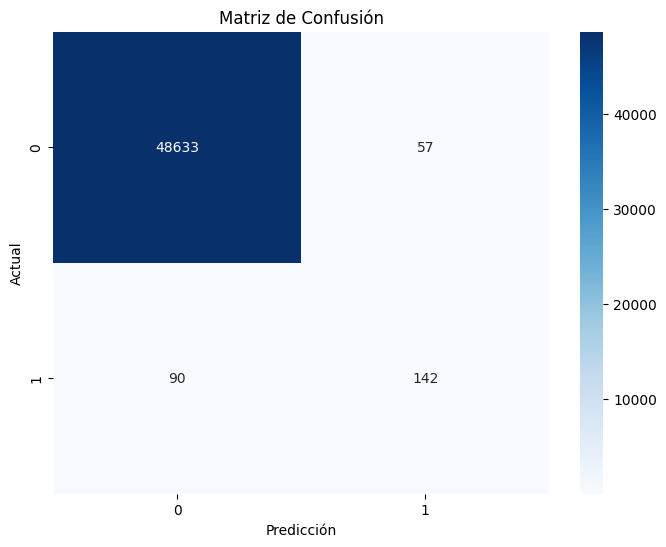

Modelo actualizado guardado en "modelo_entrenado_trimestre3_2019.h5"


c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [76]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, recall_score, f1_score, precision_score, precision_recall_curve, confusion_matrix
import seaborn as sns

# Cargando el modelo entrenado y continuando con su entrenamiento.
model = tf.keras.models.load_model('modelo_entrenado_trimestre2_2019.h5')

history = model.fit(X_train_res, y_train_res, epochs=5, batch_size=256, validation_data=(X_dev, y_dev))

# Evaluando el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Predeciendo probabilidades en el conjunto de prueba
y_pred_prob = model.predict(X_test)

# Convertiendo probabilidades en predicciones de clases usando un umbral inicial de 0.5
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculando la curva ROC, el área bajo la curva (AUC) y graficando.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Calculando y graficando la curva Precision-Recall
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label='Curva Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend()
plt.grid(True)
plt.show()

# Encontrando el umbral que maximiza el F1-score
f1_scores = 2 * (precision * recall) / (precision + recall)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds_pr[best_idx]
best_f1 = f1_scores[best_idx]
best_precision = precision[best_idx]
best_recall = recall[best_idx]

print(f'Mejor umbral: {best_threshold}')
print(f'Mejor F1-score: {best_f1}')
print(f'Precisión en el mejor umbral: {best_precision}')
print(f'Recall en el mejor umbral: {best_recall}')

# Convertiendo probabilidades en predicciones de clases usando el umbral óptimo
y_pred_optimal = (y_pred_prob > best_threshold).astype(int)

# Calcular precision, recall y F1-score con el umbral óptimo
optimal_precision = precision_score(y_test, y_pred_optimal)
optimal_recall = recall_score(y_test, y_pred_optimal)
optimal_f1 = f1_score(y_test, y_pred_optimal)

print(f'Precisión con umbral óptimo: {optimal_precision}')
print(f'Recall con umbral óptimo: {optimal_recall}')
print(f'F1-score con umbral óptimo: {optimal_f1}')

# Calculando la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_optimal)
print('Matriz de Confusión:\n', conf_matrix)

# Graficando la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

# Guardando el modelo actualizado
model.save('modelo_entrenado_trimestre3_2019.h5')
print('Modelo actualizado guardado en "modelo_entrenado_trimestre3_2019.h5"')

Random Forest

ROC-AUC: 0.966516614613211


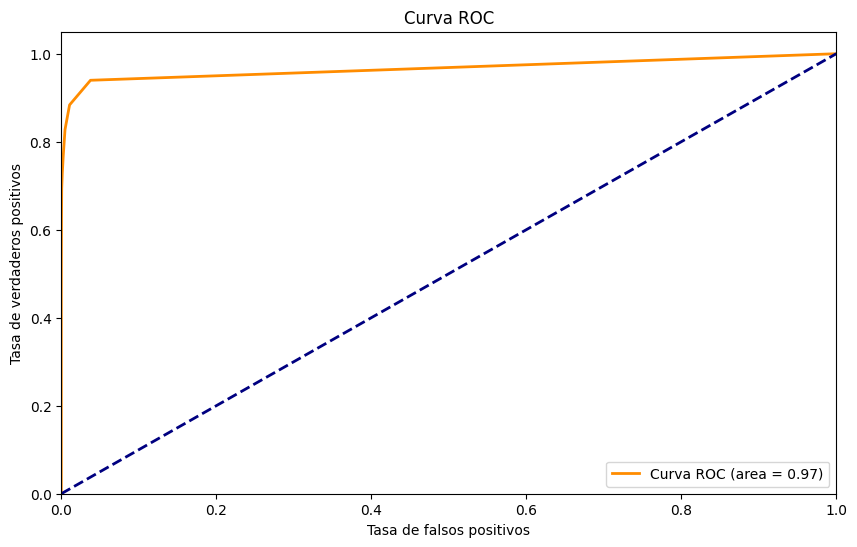

Accuracy: 0.9979968112505622
Precisión: 0.8563829787234043
Recall: 0.6939655172413793
F1-score: 0.7666666666666667
Matriz de Confusión:
 [[48663    27]
 [   71   161]]


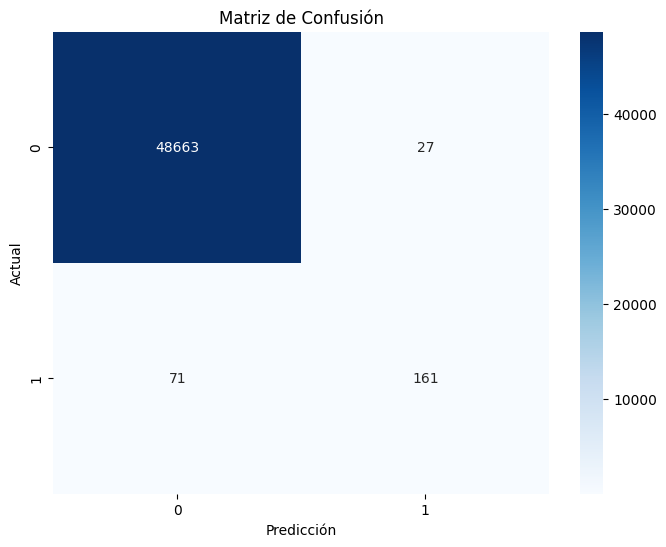

['random_forest_model_trimestre3_2019.joblib']

In [77]:
import joblib
from sklearn.metrics import roc_auc_score, recall_score, f1_score, precision_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargando el modelo
rf_classifier = joblib.load('random_forest_model_trimestre2_2019.joblib')

# Entrenando el modelo
rf_classifier.fit(X_train_res, y_train_res)

# Predeciendo probabilidades para la clase positiva
y_pred_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]

# Predeciendo clases
y_pred_rf = rf_classifier.predict(X_test)

# Calculando ROC-AUC
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
print('ROC-AUC:', roc_auc_rf)

# Gráfica de la curva ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Curva ROC (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Calculando el accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print('Accuracy:', accuracy)

# Calculando Precisión, Recall y F1-score
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print('Precisión:', precision_rf)
print('Recall:', recall_rf)
print('F1-score:', f1_rf)

# Calculando la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print('Matriz de Confusión:\n', conf_matrix)

# Graficando la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

# Guardando el modelo actualizado
joblib.dump(rf_classifier, 'random_forest_model_trimestre3_2019.joblib')

Haciendo el reentrenamiento con el cuarto trimestre de 2019

Distribución de clases antes de SMOTE: {0: 167299, 1: 844}
Distribución de clases después de SMOTE: {0: 167299, 1: 33459}


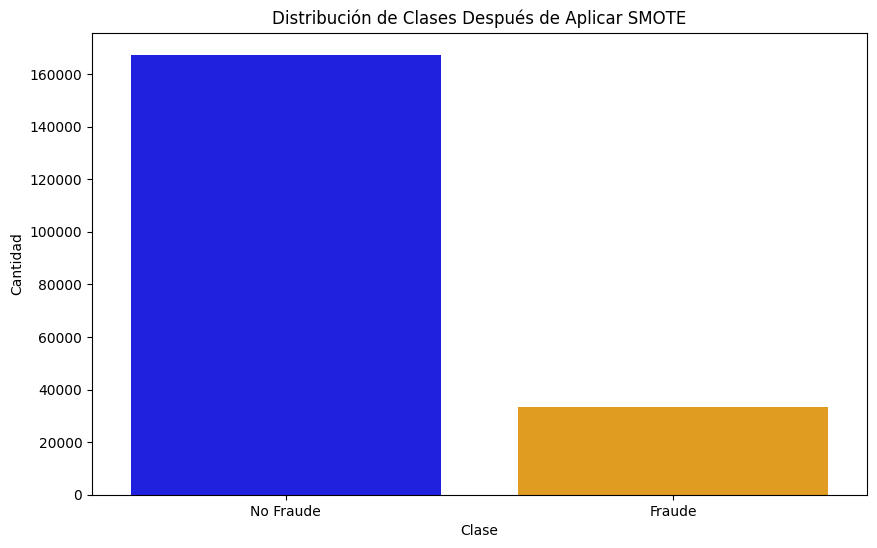

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

df_procesado['trans_date_trans_time'] = pd.to_datetime(df_procesado['trans_date_trans_time'])

# Seleccionando los datos correspondientes al cuarto trimestre del año 2019
fourth_quarter_2019_data = df_procesado[(df_procesado['trans_date_trans_time'].dt.year == 2019) & 
                                        (df_procesado['trans_date_trans_time'].dt.month >= 10) & 
                                        (df_procesado['trans_date_trans_time'].dt.month <= 12)]

# Separando características y variable objetivo
X = fourth_quarter_2019_data.drop(columns=['is_fraud', "trans_date_trans_time"])
X = X.select_dtypes(include=['float64', 'int64'])  # Seleccionando solo las columnas numéricas
y = fourth_quarter_2019_data['is_fraud']  # Variable objetivo

# Normalizando las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Divide el conjunto de datos en Train y Test
X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Divide el conjunto de entrenamiento y desarrollo (TrainDev) en Train y Dev
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, test_size=0.25, random_state=42)

# Convertir los datos a arrays NumPy
X_train, y_train = np.array(X_train), np.array(y_train)

# Contar el número de muestras en cada clase en el conjunto de entrenamiento
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))
print(f"Distribución de clases antes de SMOTE: {class_distribution}")

# Crear el objeto SMOTE con la estrategia de muestreo específica
n_minority_samples = class_distribution[1]
n_majority_samples = class_distribution[0]
desired_minority_samples = n_majority_samples // 5  # Proporción 1:5

# Crear el objeto SMOTE
sampling_strategy = {0: n_majority_samples, 1: desired_minority_samples}

smote = SMOTE(sampling_strategy=sampling_strategy)

# Ajustando y aplicando el sobremuestreo
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verificando la nueva distribución de clases
unique_res, counts_res = np.unique(y_train_res, return_counts=True)
class_distribution_res = dict(zip(unique_res, counts_res))
print(f"Distribución de clases después de SMOTE: {class_distribution_res}")

# Gráfico de barras de la variable objetivo después de SMOTE
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train_res, palette=['blue', 'orange'])
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.title('Distribución de Clases Después de Aplicar SMOTE')
plt.xticks([0, 1], ['No Fraude', 'Fraude'])
plt.show()

Redes neuronales

Epoch 1/5
785/785 [==============================] - 12s 11ms/step - loss: 0.0681 - accuracy: 0.9763 - val_loss: 0.0226 - val_accuracy: 0.9921
Epoch 2/5
785/785 [==============================] - 8s 10ms/step - loss: 0.0257 - accuracy: 0.9911 - val_loss: 0.0243 - val_accuracy: 0.9925
Epoch 3/5
785/785 [==============================] - 8s 11ms/step - loss: 0.0174 - accuracy: 0.9942 - val_loss: 0.0185 - val_accuracy: 0.9953
Epoch 4/5
785/785 [==============================] - 8s 11ms/step - loss: 0.0137 - accuracy: 0.9955 - val_loss: 0.0220 - val_accuracy: 0.9946
Epoch 5/5
1752/1752 [==============================] - 8s 4ms/step - loss: 0.0227 - accuracy: 0.9954
Test accuracy: 0.9953789710998535
1752/1752 [==============================] - 7s 4ms/step
AUC: 0.9729135153636375


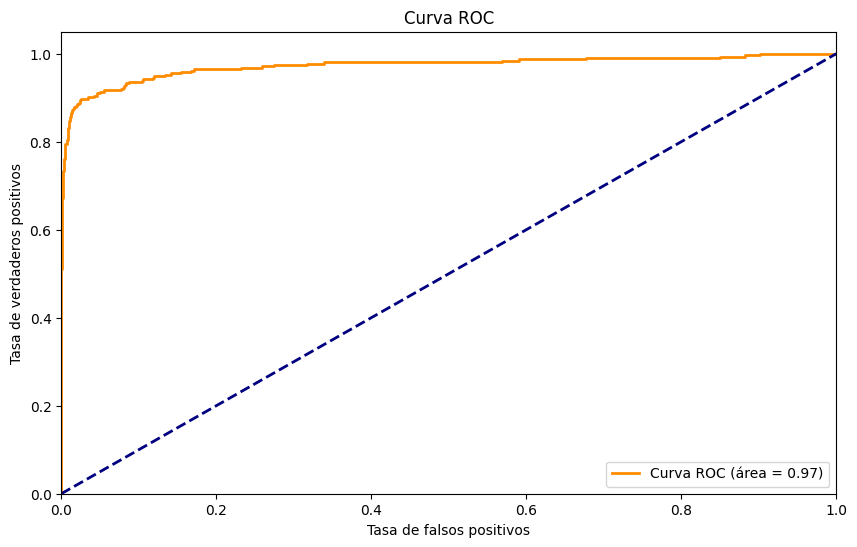

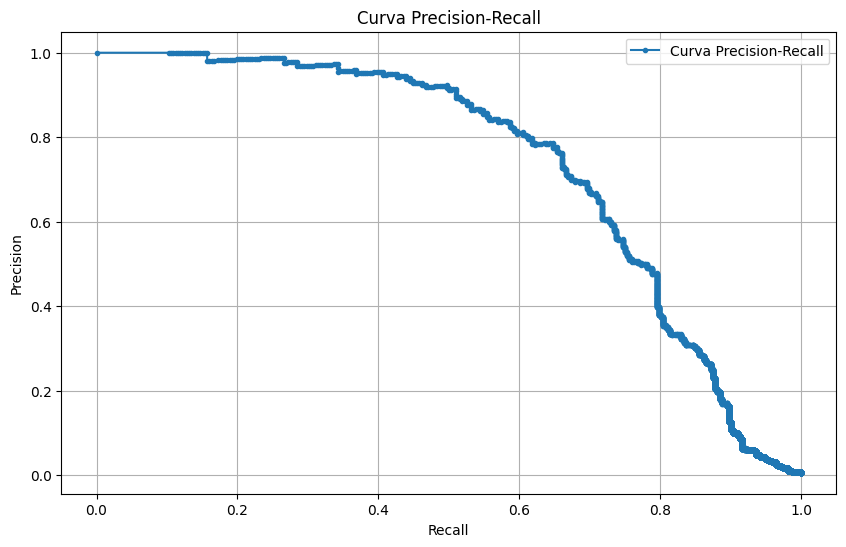

Mejor umbral: 0.9486507177352905
Mejor F1-score: 0.7100175746924429
Precisión en el mejor umbral: 0.7859922178988327
Recall en el mejor umbral: 0.6474358974358975
Precisión con umbral óptimo: 0.78515625
Recall con umbral óptimo: 0.6442307692307693
F1-score con umbral óptimo: 0.7077464788732394
Matriz de Confusión:
 [[55681    55]
 [  111   201]]


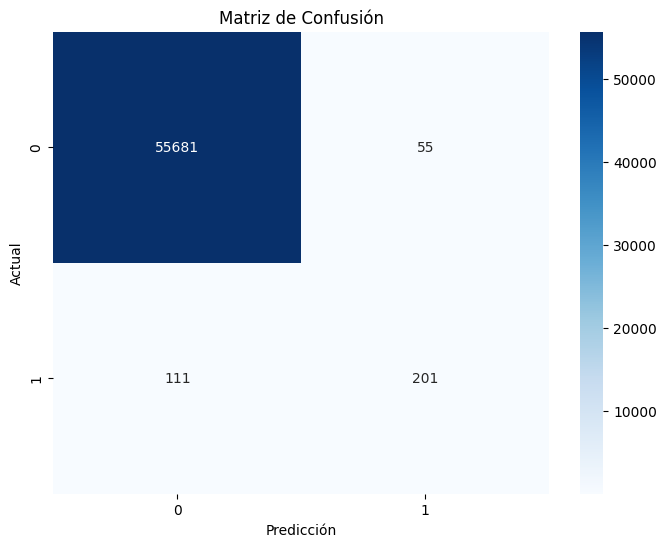

Modelo actualizado guardado en "modelo_entrenado_trimestre4_2019.h5"


c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [79]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, recall_score, f1_score, precision_score, precision_recall_curve, confusion_matrix
import seaborn as sns

# Cargando el modelo entrenado y continuando con su entrenamiento.
model = tf.keras.models.load_model('modelo_entrenado_trimestre3_2019.h5')

history = model.fit(X_train_res, y_train_res, epochs=5, batch_size=256, validation_data=(X_dev, y_dev))

# Evaluando el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Predeciendo probabilidades en el conjunto de prueba
y_pred_prob = model.predict(X_test)

# Convertiendo probabilidades en predicciones de clases usando un umbral inicial de 0.5
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculando la curva ROC, el área bajo la curva (AUC) y graficando.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Calculando y graficando la curva Precision-Recall
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label='Curva Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend()
plt.grid(True)
plt.show()

# Encontrando el umbral que maximiza el F1-score
f1_scores = 2 * (precision * recall) / (precision + recall)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds_pr[best_idx]
best_f1 = f1_scores[best_idx]
best_precision = precision[best_idx]
best_recall = recall[best_idx]

print(f'Mejor umbral: {best_threshold}')
print(f'Mejor F1-score: {best_f1}')
print(f'Precisión en el mejor umbral: {best_precision}')
print(f'Recall en el mejor umbral: {best_recall}')

# Convertiendo probabilidades en predicciones de clases usando el umbral óptimo
y_pred_optimal = (y_pred_prob > best_threshold).astype(int)

# Calcular precision, recall y F1-score con el umbral óptimo
optimal_precision = precision_score(y_test, y_pred_optimal)
optimal_recall = recall_score(y_test, y_pred_optimal)
optimal_f1 = f1_score(y_test, y_pred_optimal)

print(f'Precisión con umbral óptimo: {optimal_precision}')
print(f'Recall con umbral óptimo: {optimal_recall}')
print(f'F1-score con umbral óptimo: {optimal_f1}')

# Calculando la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_optimal)
print('Matriz de Confusión:\n', conf_matrix)

# Graficando la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

# Guardando el modelo actualizado
model.save('modelo_entrenado_trimestre4_2019.h5')
print('Modelo actualizado guardado en "modelo_entrenado_trimestre4_2019.h5"')

Random Forest

ROC-AUC: 0.9606504036428143


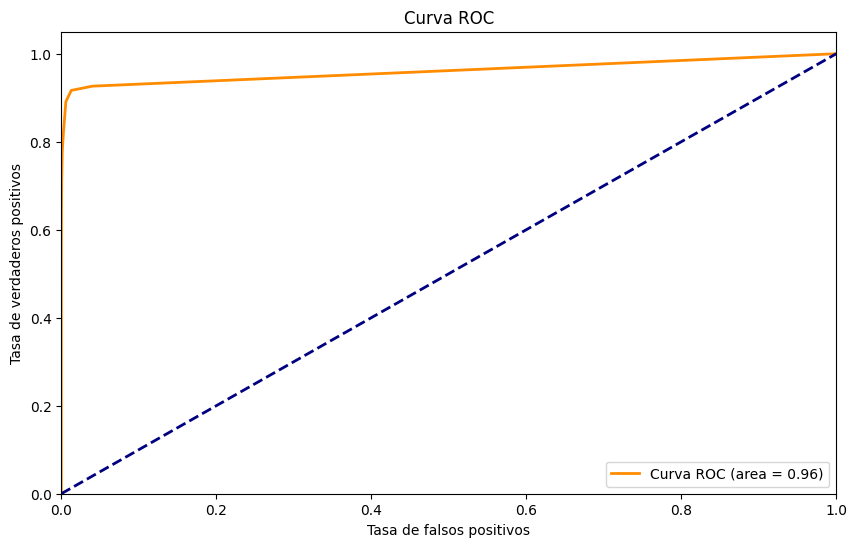

Accuracy: 0.997841136168998
Precisión: 0.8804780876494024
Recall: 0.7083333333333334
F1-score: 0.7850799289520426
Matriz de Confusión:
 [[55706    30]
 [   91   221]]


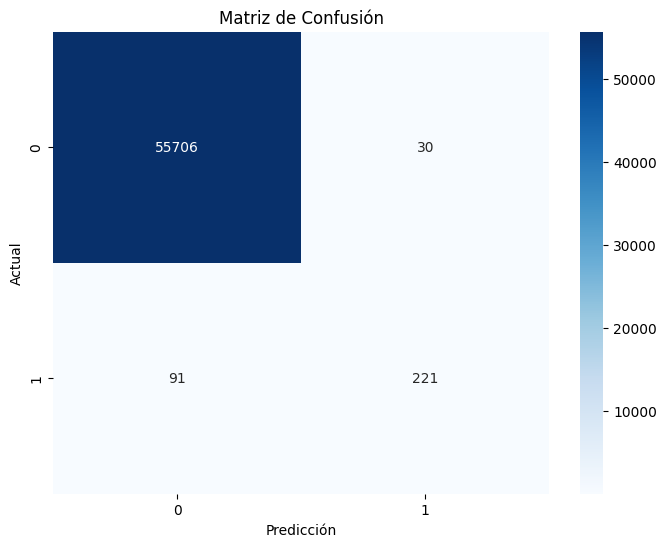

['random_forest_model_trimestre4_2019.joblib']

In [80]:
import joblib
from sklearn.metrics import roc_auc_score, recall_score, f1_score, precision_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargando el modelo
rf_classifier = joblib.load('random_forest_model_trimestre3_2019.joblib')

# Entrenando el modelo
rf_classifier.fit(X_train_res, y_train_res)

# Predeciendo probabilidades para la clase positiva
y_pred_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]

# Predeciendo clases
y_pred_rf = rf_classifier.predict(X_test)

# Calculando ROC-AUC
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
print('ROC-AUC:', roc_auc_rf)

# Gráfica de la curva ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Curva ROC (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Calculando el accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print('Accuracy:', accuracy)

# Calculando Precisión, Recall y F1-score
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print('Precisión:', precision_rf)
print('Recall:', recall_rf)
print('F1-score:', f1_rf)

# Calculando la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print('Matriz de Confusión:\n', conf_matrix)

# Graficando la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

# Guardando el modelo actualizado
joblib.dump(rf_classifier, 'random_forest_model_trimestre4_2019.joblib')

Haciendo el reentrenamiento con el año 2020 trimestre 1

Distribución de clases antes de SMOTE: {0: 103037, 1: 668}
Distribución de clases después de SMOTE: {0: 103037, 1: 20607}


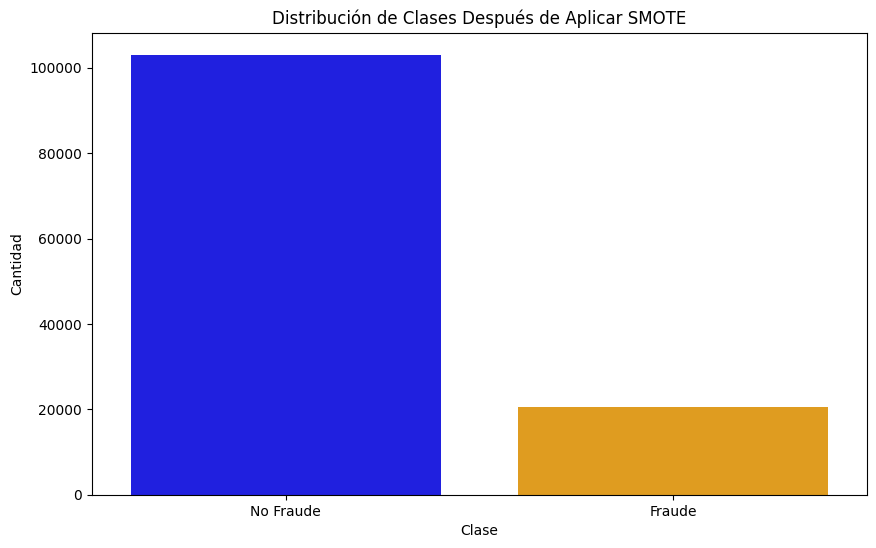

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

df_procesado['trans_date_trans_time'] = pd.to_datetime(df_procesado['trans_date_trans_time'])

# Seleccionando los datos correspondientes al primer semestre del año 2019
first_half_2019_data = df_procesado[(df_procesado['trans_date_trans_time'].dt.year == 2020) & 
                                    (df_procesado['trans_date_trans_time'].dt.month <= 3)]

# Separando características y variable objetivo
X = first_half_2019_data.drop(columns=['is_fraud', "trans_date_trans_time"])
X = X.select_dtypes(include=['float64', 'int64'])  # Seleccionando solo las columnas numéricas
y = first_half_2019_data['is_fraud']  # Variable objetivo

# Normalizando las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Divide el conjunto de datos en Train y Test
X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Divide el conjunto de entrenamiento y desarrollo (TrainDev) en Train y Dev
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, test_size=0.25, random_state=42)

# Convertir los datos a arrays NumPy
X_train, y_train = np.array(X_train), np.array(y_train)

# Contar el número de muestras en cada clase en el conjunto de entrenamiento
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))
print(f"Distribución de clases antes de SMOTE: {class_distribution}")

# Crear el objeto SMOTE con la estrategia de muestreo específica
n_minority_samples = class_distribution[1]
n_majority_samples = class_distribution[0]
desired_minority_samples = n_majority_samples // 5  # Proporción 1:5

# Crear el objeto SMOTE
sampling_strategy = {0: n_majority_samples, 1: desired_minority_samples}

smote = SMOTE(sampling_strategy=sampling_strategy)

# Ajustando y aplicando el sobremuestreo
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verificando la nueva distribución de clases
unique_res, counts_res = np.unique(y_train_res, return_counts=True)
class_distribution_res = dict(zip(unique_res, counts_res))
print(f"Distribución de clases después de SMOTE: {class_distribution_res}")

# Gráfico de barras de la variable objetivo después de SMOTE
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train_res, palette=['blue', 'orange'])
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.title('Distribución de Clases Después de Aplicar SMOTE')
plt.xticks([0, 1], ['No Fraude', 'Fraude'])
plt.show()

Redes neuronales

Epoch 1/5
483/483 [==============================] - 8s 11ms/step - loss: 0.0736 - accuracy: 0.9764 - val_loss: 0.0220 - val_accuracy: 0.9928
Epoch 2/5
483/483 [==============================] - 5s 9ms/step - loss: 0.0241 - accuracy: 0.9920 - val_loss: 0.0230 - val_accuracy: 0.9926
Epoch 3/5
483/483 [==============================] - 5s 10ms/step - loss: 0.0157 - accuracy: 0.9950 - val_loss: 0.0199 - val_accuracy: 0.9948
Epoch 4/5
483/483 [==============================] - 5s 11ms/step - loss: 0.0129 - accuracy: 0.9958 - val_loss: 0.0229 - val_accuracy: 0.9940
Epoch 5/5
1081/1081 [==============================] - 5s 5ms/step - loss: 0.0207 - accuracy: 0.9948
Test accuracy: 0.9947929978370667
1081/1081 [==============================] - 4s 4ms/step
AUC: 0.984771747873518


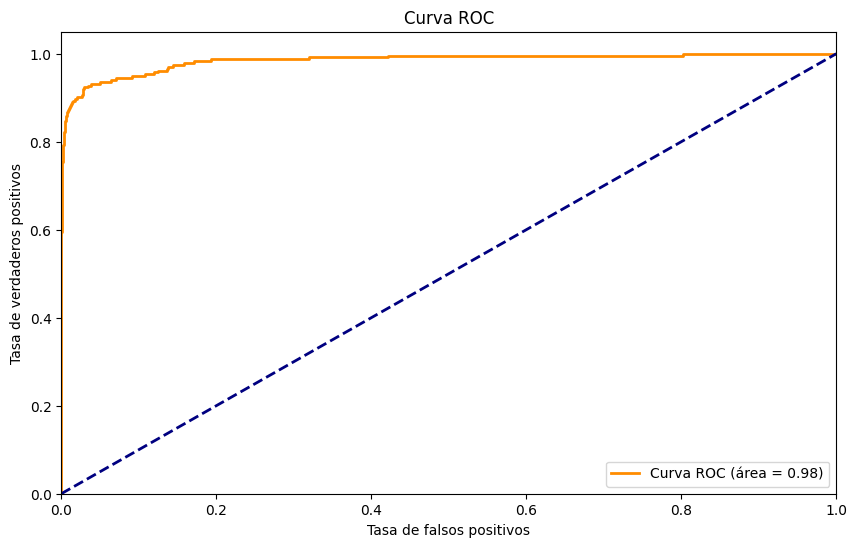

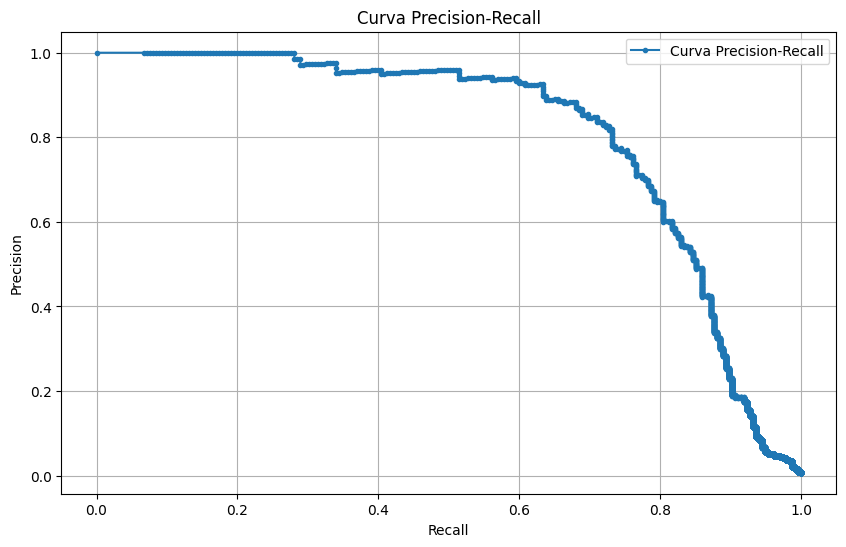

Mejor umbral: 0.9605855941772461
Mejor F1-score: 0.7737556561085973
Precisión en el mejor umbral: 0.8260869565217391
Recall en el mejor umbral: 0.7276595744680852
Precisión con umbral óptimo: 0.8252427184466019
Recall con umbral óptimo: 0.723404255319149
F1-score con umbral óptimo: 0.7709750566893424
Matriz de Confusión:
 [[34298    36]
 [   65   170]]


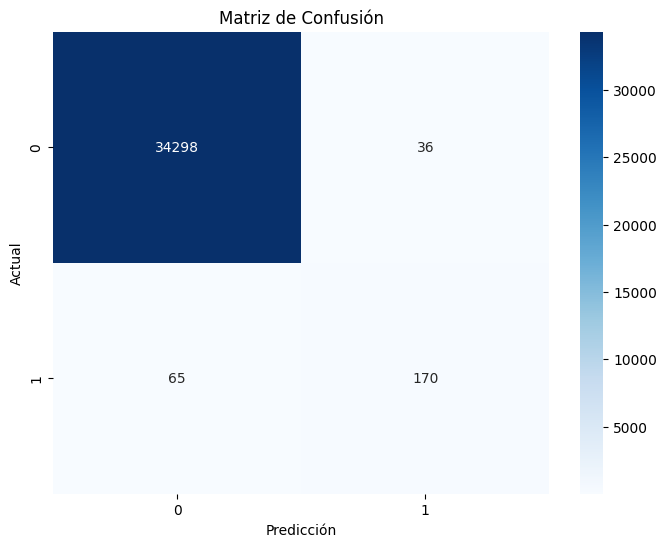

Modelo actualizado guardado en "modelo_entrenado_trimestre1_2020.h5"


c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [82]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, recall_score, f1_score, precision_score, precision_recall_curve, confusion_matrix
import seaborn as sns

# Cargando el modelo entrenado y continuando con su entrenamiento.
model = tf.keras.models.load_model('modelo_entrenado_trimestre4_2019.h5')

history = model.fit(X_train_res, y_train_res, epochs=5, batch_size=256, validation_data=(X_dev, y_dev))

# Evaluando el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Predeciendo probabilidades en el conjunto de prueba
y_pred_prob = model.predict(X_test)

# Convertiendo probabilidades en predicciones de clases usando un umbral inicial de 0.5
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculando la curva ROC, el área bajo la curva (AUC) y graficando.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Calculando y graficando la curva Precision-Recall
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label='Curva Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend()
plt.grid(True)
plt.show()

# Encontrando el umbral que maximiza el F1-score
f1_scores = 2 * (precision * recall) / (precision + recall)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds_pr[best_idx]
best_f1 = f1_scores[best_idx]
best_precision = precision[best_idx]
best_recall = recall[best_idx]

print(f'Mejor umbral: {best_threshold}')
print(f'Mejor F1-score: {best_f1}')
print(f'Precisión en el mejor umbral: {best_precision}')
print(f'Recall en el mejor umbral: {best_recall}')

# Convertiendo probabilidades en predicciones de clases usando el umbral óptimo
y_pred_optimal = (y_pred_prob > best_threshold).astype(int)

# Calcular precision, recall y F1-score con el umbral óptimo
optimal_precision = precision_score(y_test, y_pred_optimal)
optimal_recall = recall_score(y_test, y_pred_optimal)
optimal_f1 = f1_score(y_test, y_pred_optimal)

print(f'Precisión con umbral óptimo: {optimal_precision}')
print(f'Recall con umbral óptimo: {optimal_recall}')
print(f'F1-score con umbral óptimo: {optimal_f1}')

# Calculando la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_optimal)
print('Matriz de Confusión:\n', conf_matrix)

# Graficando la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

# Guardando el modelo actualizado
model.save('modelo_entrenado_trimestre1_2020.h5')
print('Modelo actualizado guardado en "modelo_entrenado_trimestre1_2020.h5"')

Random Forest

ROC-AUC: 0.9794151074116718


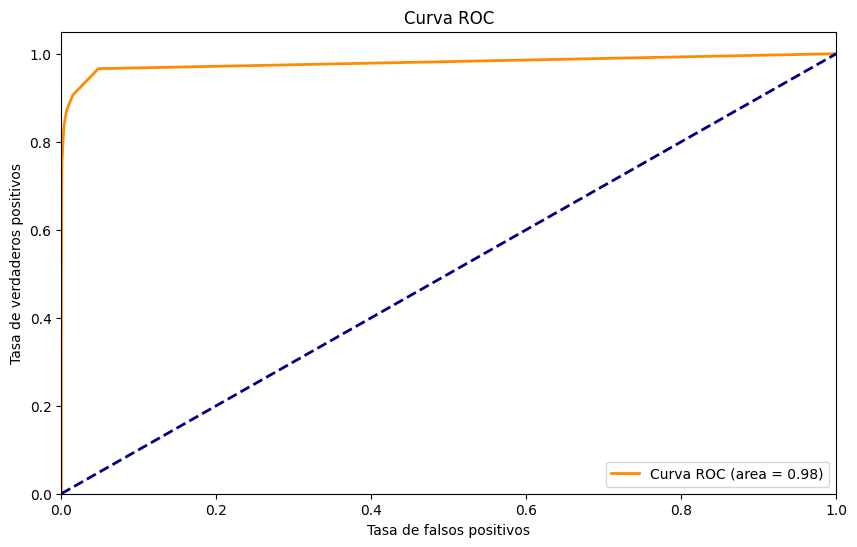

Accuracy: 0.9973675836732332
Precisión: 0.839622641509434
Recall: 0.7574468085106383
F1-score: 0.796420581655481
Matriz de Confusión:
 [[34300    34]
 [   57   178]]


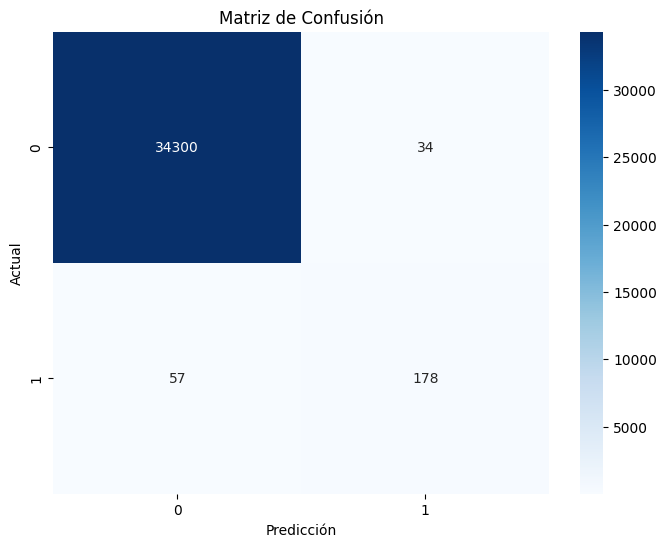

['random_forest_model_trimestre1_2020.joblib']

In [83]:
import joblib
from sklearn.metrics import roc_auc_score, recall_score, f1_score, precision_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargando el modelo
rf_classifier = joblib.load('random_forest_model_trimestre1_2019.joblib')

# Entrenando el modelo
rf_classifier.fit(X_train_res, y_train_res)

# Predeciendo probabilidades para la clase positiva
y_pred_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]

# Predeciendo clases
y_pred_rf = rf_classifier.predict(X_test)

# Calculando ROC-AUC
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
print('ROC-AUC:', roc_auc_rf)

# Gráfica de la curva ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Curva ROC (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Calculando el accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print('Accuracy:', accuracy)

# Calculando Precisión, Recall y F1-score
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print('Precisión:', precision_rf)
print('Recall:', recall_rf)
print('F1-score:', f1_rf)

# Calculando la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print('Matriz de Confusión:\n', conf_matrix)

# Graficando la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

# Guardando el modelo actualizado
joblib.dump(rf_classifier, 'random_forest_model_trimestre1_2020.joblib')

Haciendo el reentrenamiento con el año 2020 trimestre 2

Distribución de clases antes de SMOTE: {0: 136636, 1: 788}
Distribución de clases después de SMOTE: {0: 136636, 1: 27327}


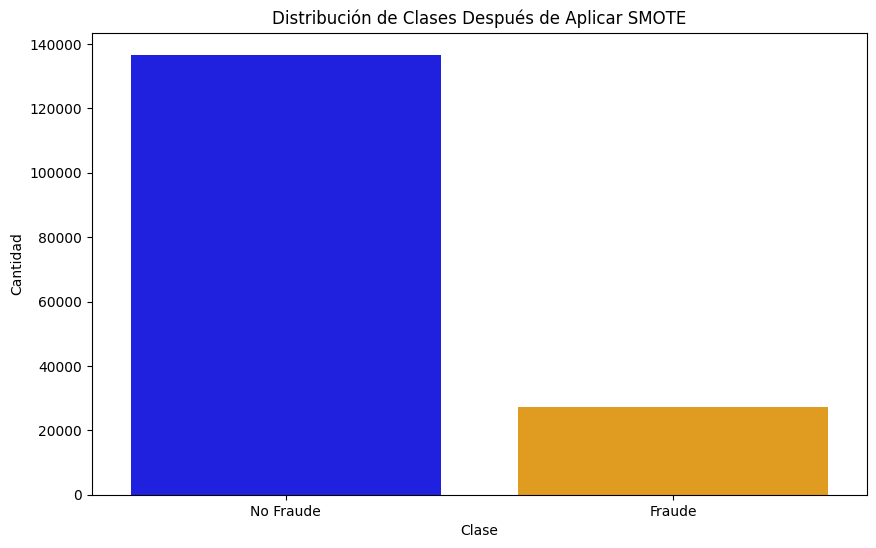

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

df_procesado['trans_date_trans_time'] = pd.to_datetime(df_procesado['trans_date_trans_time'])

# Seleccionando los datos correspondientes al segundo trimestre del año 2019
second_quarter_2019_data = df_procesado[(df_procesado['trans_date_trans_time'].dt.year == 2020) & 
                                        (df_procesado['trans_date_trans_time'].dt.month >= 4) & 
                                        (df_procesado['trans_date_trans_time'].dt.month <= 6)]

# Separando características y variable objetivo
X = second_quarter_2019_data.drop(columns=['is_fraud', "trans_date_trans_time"])
X = X.select_dtypes(include=['float64', 'int64'])  # Seleccionando solo las columnas numéricas
y = second_quarter_2019_data['is_fraud']  # Variable objetivo

# Normalizando las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Divide el conjunto de datos en Train y Test
X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Divide el conjunto de entrenamiento y desarrollo (TrainDev) en Train y Dev
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, test_size=0.25, random_state=42)

# Convertir los datos a arrays NumPy
X_train, y_train = np.array(X_train), np.array(y_train)

# Contar el número de muestras en cada clase en el conjunto de entrenamiento
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))
print(f"Distribución de clases antes de SMOTE: {class_distribution}")

# Crear el objeto SMOTE con la estrategia de muestreo específica
n_minority_samples = class_distribution[1]
n_majority_samples = class_distribution[0]
desired_minority_samples = n_majority_samples // 5  # Proporción 1:5

# Crear el objeto SMOTE
sampling_strategy = {0: n_majority_samples, 1: desired_minority_samples}

smote = SMOTE(sampling_strategy=sampling_strategy)

# Ajustando y aplicando el sobremuestreo
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verificando la nueva distribución de clases
unique_res, counts_res = np.unique(y_train_res, return_counts=True)
class_distribution_res = dict(zip(unique_res, counts_res))
print(f"Distribución de clases después de SMOTE: {class_distribution_res}")

# Gráfico de barras de la variable objetivo después de SMOTE
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train_res, palette=['blue', 'orange'])
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.title('Distribución de Clases Después de Aplicar SMOTE')
plt.xticks([0, 1], ['No Fraude', 'Fraude'])
plt.show()


Redes neuronales

Epoch 1/5
641/641 [==============================] - 9s 10ms/step - loss: 0.0669 - accuracy: 0.9780 - val_loss: 0.0277 - val_accuracy: 0.9901
Epoch 2/5
641/641 [==============================] - 6s 9ms/step - loss: 0.0227 - accuracy: 0.9926 - val_loss: 0.0256 - val_accuracy: 0.9923
Epoch 3/5
641/641 [==============================] - 6s 9ms/step - loss: 0.0159 - accuracy: 0.9948 - val_loss: 0.0238 - val_accuracy: 0.9935
Epoch 4/5
641/641 [==============================] - 6s 9ms/step - loss: 0.0119 - accuracy: 0.9962 - val_loss: 0.0180 - val_accuracy: 0.9962
Epoch 5/5
1432/1432 [==============================] - 6s 4ms/step - loss: 0.0317 - accuracy: 0.9930
Test accuracy: 0.9929924607276917
1432/1432 [==============================] - 5s 4ms/step
AUC: 0.9642148546742276


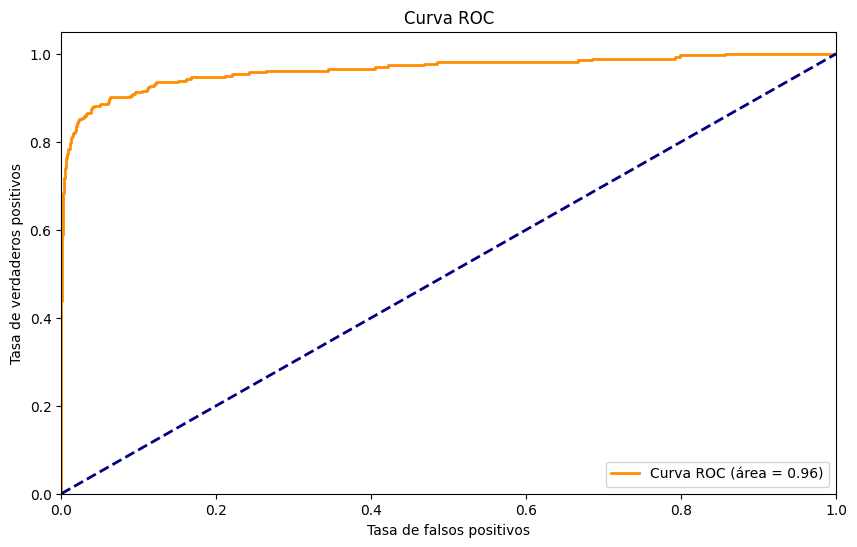

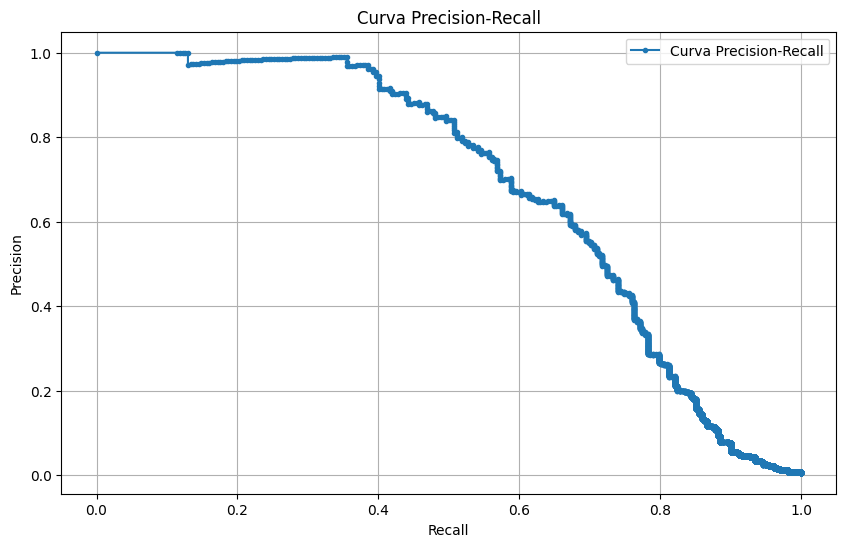

Mejor umbral: 0.9651396870613098
Mejor F1-score: 0.6500956022944551
Precisión en el mejor umbral: 0.6513409961685823
Recall en el mejor umbral: 0.648854961832061
Precisión con umbral óptimo: 0.65
Recall con umbral óptimo: 0.6450381679389313
F1-score con umbral óptimo: 0.6475095785440613
Matriz de Confusión:
 [[45455    91]
 [   93   169]]


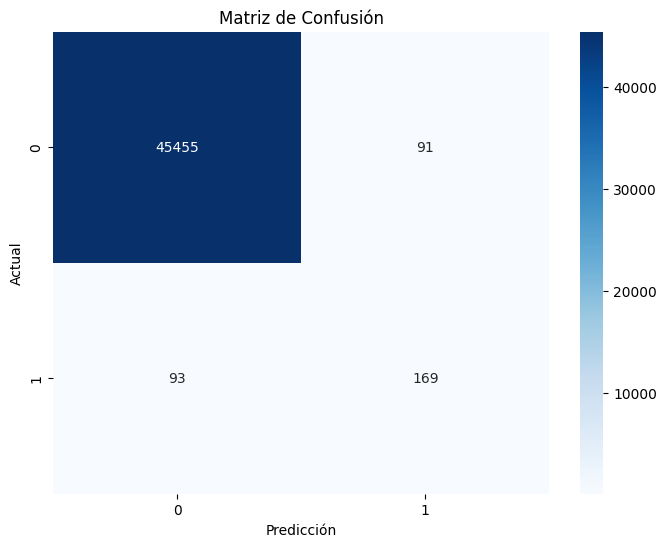

Modelo actualizado guardado en "modelo_entrenado_trimestre2_2020.h5"


c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [85]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, recall_score, f1_score, precision_score, precision_recall_curve, confusion_matrix
import seaborn as sns

# Cargando el modelo entrenado y continuando con su entrenamiento.
model = tf.keras.models.load_model('modelo_entrenado_trimestre1_2020.h5')

history = model.fit(X_train_res, y_train_res, epochs=5, batch_size=256, validation_data=(X_dev, y_dev))

# Evaluando el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Predeciendo probabilidades en el conjunto de prueba
y_pred_prob = model.predict(X_test)

# Convertiendo probabilidades en predicciones de clases usando un umbral inicial de 0.5
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculando la curva ROC, el área bajo la curva (AUC) y graficando.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Calculando y graficando la curva Precision-Recall
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label='Curva Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend()
plt.grid(True)
plt.show()

# Encontrando el umbral que maximiza el F1-score
f1_scores = 2 * (precision * recall) / (precision + recall)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds_pr[best_idx]
best_f1 = f1_scores[best_idx]
best_precision = precision[best_idx]
best_recall = recall[best_idx]

print(f'Mejor umbral: {best_threshold}')
print(f'Mejor F1-score: {best_f1}')
print(f'Precisión en el mejor umbral: {best_precision}')
print(f'Recall en el mejor umbral: {best_recall}')

# Convertiendo probabilidades en predicciones de clases usando el umbral óptimo
y_pred_optimal = (y_pred_prob > best_threshold).astype(int)

# Calcular precision, recall y F1-score con el umbral óptimo
optimal_precision = precision_score(y_test, y_pred_optimal)
optimal_recall = recall_score(y_test, y_pred_optimal)
optimal_f1 = f1_score(y_test, y_pred_optimal)

print(f'Precisión con umbral óptimo: {optimal_precision}')
print(f'Recall con umbral óptimo: {optimal_recall}')
print(f'F1-score con umbral óptimo: {optimal_f1}')

# Calculando la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_optimal)
print('Matriz de Confusión:\n', conf_matrix)

# Graficando la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

# Guardando el modelo actualizado
model.save('modelo_entrenado_trimestre2_2020.h5')
print('Modelo actualizado guardado en "modelo_entrenado_trimestre2_2020.h5"')

Random Forest

ROC-AUC: 0.9514477520084551


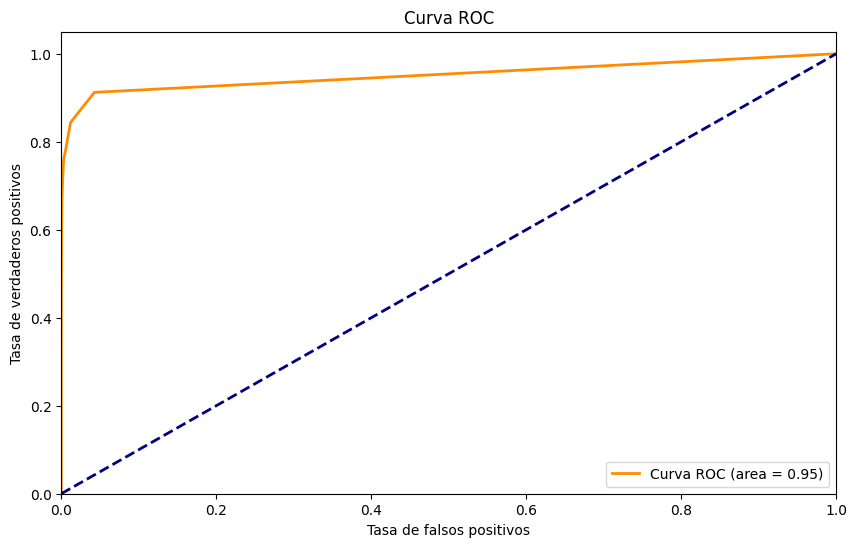

Accuracy: 0.9971620677610897
Precisión: 0.8
Recall: 0.6717557251908397
F1-score: 0.7302904564315352
Matriz de Confusión:
 [[45502    44]
 [   86   176]]


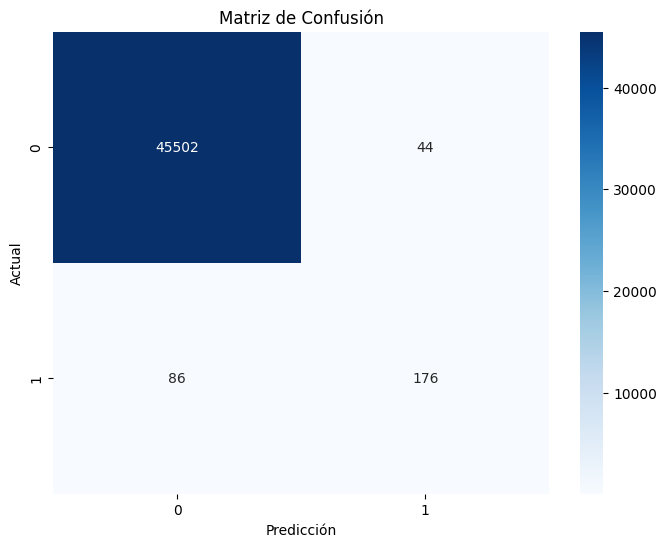

['random_forest_model_trimestre2_2020.joblib']

In [86]:
import joblib
from sklearn.metrics import roc_auc_score, recall_score, f1_score, precision_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargando el modelo
rf_classifier = joblib.load('random_forest_model_trimestre1_2020.joblib')

# Entrenando el modelo
rf_classifier.fit(X_train_res, y_train_res)

# Predeciendo probabilidades para la clase positiva
y_pred_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]

# Predeciendo clases
y_pred_rf = rf_classifier.predict(X_test)

# Calculando ROC-AUC
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
print('ROC-AUC:', roc_auc_rf)

# Gráfica de la curva ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Curva ROC (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Calculando el accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print('Accuracy:', accuracy)

# Calculando Precisión, Recall y F1-score
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print('Precisión:', precision_rf)
print('Recall:', recall_rf)
print('F1-score:', f1_rf)

# Calculando la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print('Matriz de Confusión:\n', conf_matrix)

# Graficando la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

# Guardando el modelo actualizado
joblib.dump(rf_classifier, 'random_forest_model_trimestre2_2020.joblib')

Haciendo reentreno con el tercer trimestre de 2020

Distribución de clases antes de SMOTE: {0: 145870, 1: 614}
Distribución de clases después de SMOTE: {0: 145870, 1: 29174}


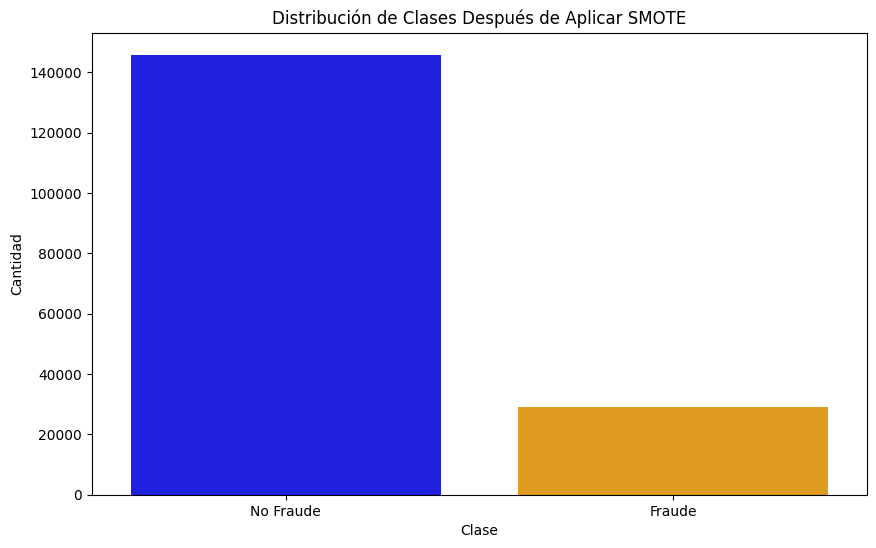

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

df_procesado['trans_date_trans_time'] = pd.to_datetime(df_procesado['trans_date_trans_time'])

# Seleccionando los datos correspondientes al tercer trimestre del año 2019
third_quarter_2019_data = df_procesado[(df_procesado['trans_date_trans_time'].dt.year == 2020) & 
                                       (df_procesado['trans_date_trans_time'].dt.month >= 7) & 
                                       (df_procesado['trans_date_trans_time'].dt.month <= 9)]

# Separando características y variable objetivo
X = third_quarter_2019_data.drop(columns=['is_fraud', "trans_date_trans_time"])
X = X.select_dtypes(include=['float64', 'int64'])  # Seleccionando solo las columnas numéricas
y = third_quarter_2019_data['is_fraud']  # Variable objetivo

# Normalizando las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Divide el conjunto de datos en Train y Test
X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Divide el conjunto de entrenamiento y desarrollo (TrainDev) en Train y Dev
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, test_size=0.25, random_state=42)

# Convertir los datos a arrays NumPy
X_train, y_train = np.array(X_train), np.array(y_train)

# Contar el número de muestras en cada clase en el conjunto de entrenamiento
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))
print(f"Distribución de clases antes de SMOTE: {class_distribution}")

# Crear el objeto SMOTE con la estrategia de muestreo específica
n_minority_samples = class_distribution[1]
n_majority_samples = class_distribution[0]
desired_minority_samples = n_majority_samples // 5  # Proporción 1:5

# Crear el objeto SMOTE
sampling_strategy = {0: n_majority_samples, 1: desired_minority_samples}

smote = SMOTE(sampling_strategy=sampling_strategy)

# Ajustando y aplicando el sobremuestreo
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verificando la nueva distribución de clases
unique_res, counts_res = np.unique(y_train_res, return_counts=True)
class_distribution_res = dict(zip(unique_res, counts_res))
print(f"Distribución de clases después de SMOTE: {class_distribution_res}")

# Gráfico de barras de la variable objetivo después de SMOTE
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train_res, palette=['blue', 'orange'])
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.title('Distribución de Clases Después de Aplicar SMOTE')
plt.xticks([0, 1], ['No Fraude', 'Fraude'])
plt.show()

Redes neuronales

Epoch 1/5
684/684 [==============================] - 5s 5ms/step - loss: 0.0559 - accuracy: 0.9819 - val_loss: 0.0185 - val_accuracy: 0.9947
Epoch 2/5
684/684 [==============================] - 3s 4ms/step - loss: 0.0170 - accuracy: 0.9944 - val_loss: 0.0165 - val_accuracy: 0.9959
Epoch 3/5
684/684 [==============================] - 3s 4ms/step - loss: 0.0128 - accuracy: 0.9961 - val_loss: 0.0152 - val_accuracy: 0.9968
Epoch 4/5
684/684 [==============================] - 3s 5ms/step - loss: 0.0095 - accuracy: 0.9971 - val_loss: 0.0203 - val_accuracy: 0.9952
Epoch 5/5
1526/1526 [==============================] - 3s 2ms/step - loss: 0.0194 - accuracy: 0.9958
Test accuracy: 0.995801568031311
1526/1526 [==============================] - 2s 2ms/step
AUC: 0.979557883907299


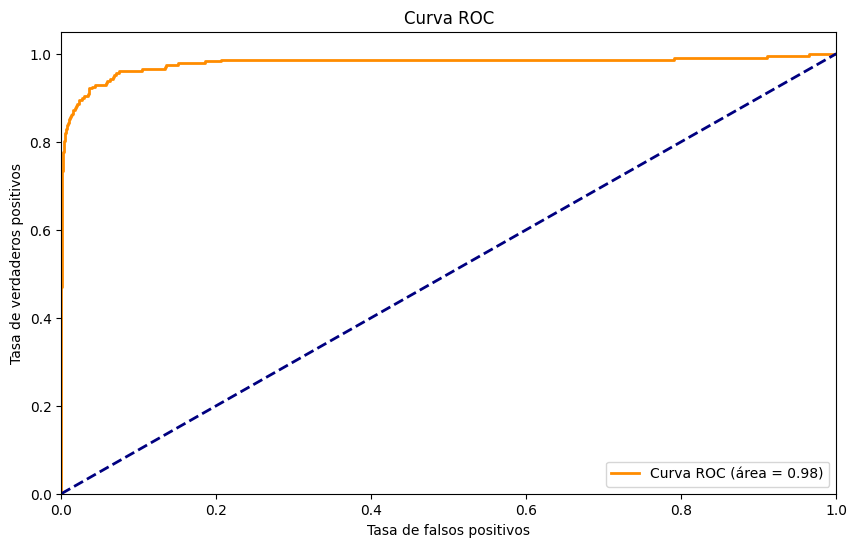

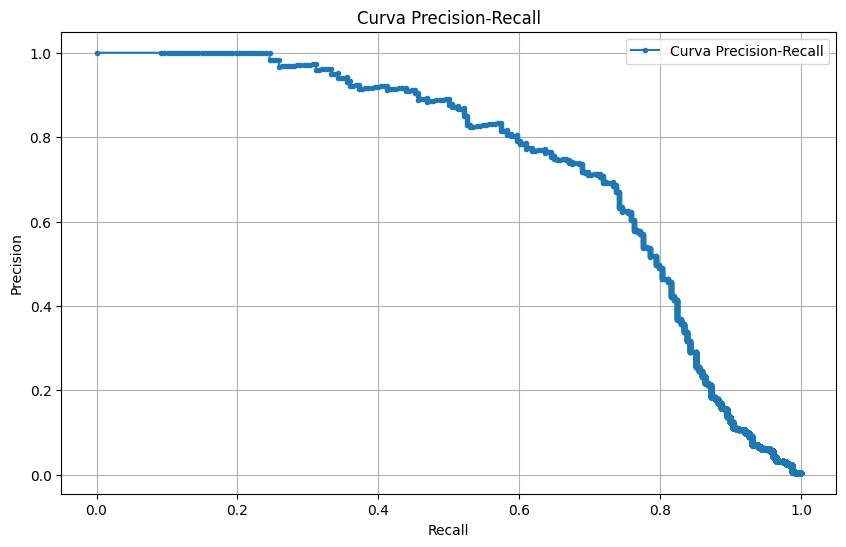

Mejor umbral: 0.9413551092147827
Mejor F1-score: 0.713347921225383
Precisión en el mejor umbral: 0.7117903930131004
Recall en el mejor umbral: 0.7149122807017544
Precisión con umbral óptimo: 0.7105263157894737
Recall con umbral óptimo: 0.7105263157894737
F1-score con umbral óptimo: 0.7105263157894737
Matriz de Confusión:
 [[48534    66]
 [   66   162]]


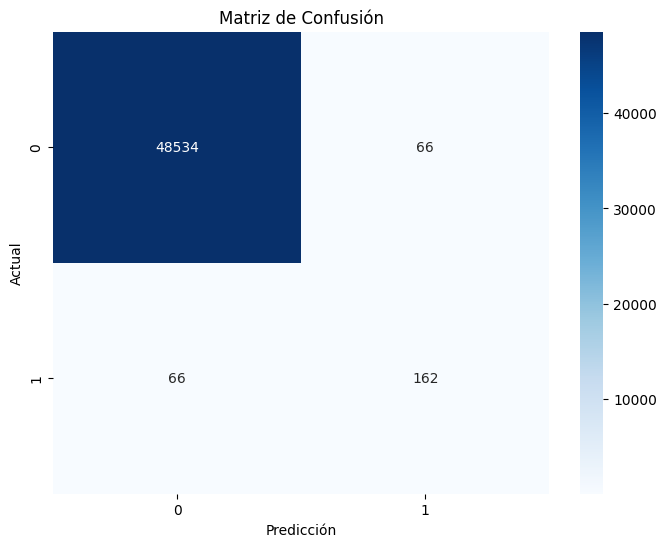

Modelo actualizado guardado en "modelo_entrenado_trimestre3_2020.h5"


c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [88]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, recall_score, f1_score, precision_score, precision_recall_curve, confusion_matrix
import seaborn as sns

# Cargando el modelo entrenado y continuando con su entrenamiento.
model = tf.keras.models.load_model('modelo_entrenado_trimestre2_2020.h5')

history = model.fit(X_train_res, y_train_res, epochs=5, batch_size=256, validation_data=(X_dev, y_dev))

# Evaluando el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Predeciendo probabilidades en el conjunto de prueba
y_pred_prob = model.predict(X_test)

# Convertiendo probabilidades en predicciones de clases usando un umbral inicial de 0.5
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculando la curva ROC, el área bajo la curva (AUC) y graficando.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Calculando y graficando la curva Precision-Recall
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label='Curva Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend()
plt.grid(True)
plt.show()

# Encontrando el umbral que maximiza el F1-score
f1_scores = 2 * (precision * recall) / (precision + recall)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds_pr[best_idx]
best_f1 = f1_scores[best_idx]
best_precision = precision[best_idx]
best_recall = recall[best_idx]

print(f'Mejor umbral: {best_threshold}')
print(f'Mejor F1-score: {best_f1}')
print(f'Precisión en el mejor umbral: {best_precision}')
print(f'Recall en el mejor umbral: {best_recall}')

# Convertiendo probabilidades en predicciones de clases usando el umbral óptimo
y_pred_optimal = (y_pred_prob > best_threshold).astype(int)

# Calcular precision, recall y F1-score con el umbral óptimo
optimal_precision = precision_score(y_test, y_pred_optimal)
optimal_recall = recall_score(y_test, y_pred_optimal)
optimal_f1 = f1_score(y_test, y_pred_optimal)

print(f'Precisión con umbral óptimo: {optimal_precision}')
print(f'Recall con umbral óptimo: {optimal_recall}')
print(f'F1-score con umbral óptimo: {optimal_f1}')

# Calculando la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_optimal)
print('Matriz de Confusión:\n', conf_matrix)

# Graficando la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

# Guardando el modelo actualizado
model.save('modelo_entrenado_trimestre3_2020.h5')
print('Modelo actualizado guardado en "modelo_entrenado_trimestre3_2020.h5"')

Random Forest

ROC-AUC: 0.9730456735975742


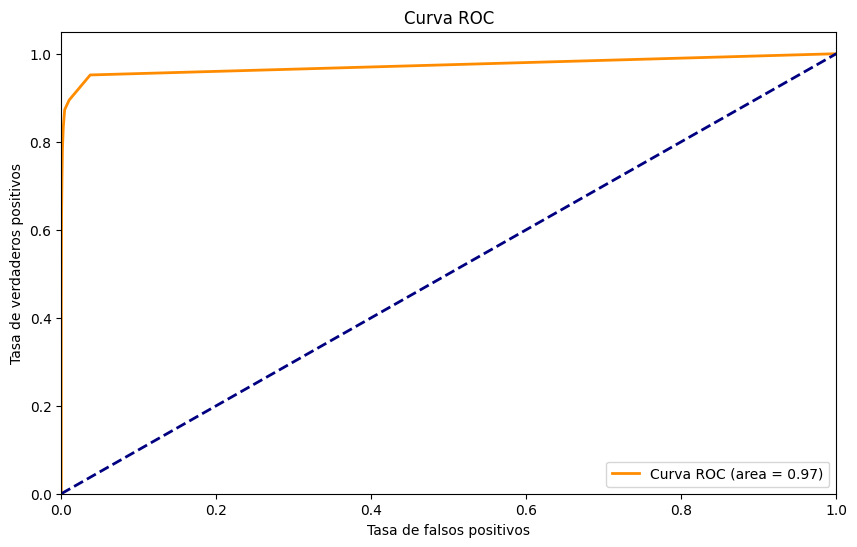

Accuracy: 0.997808634390104
Precisión: 0.7980295566502463
Recall: 0.7105263157894737
F1-score: 0.7517401392111369
Matriz de Confusión:
 [[48559    41]
 [   66   162]]


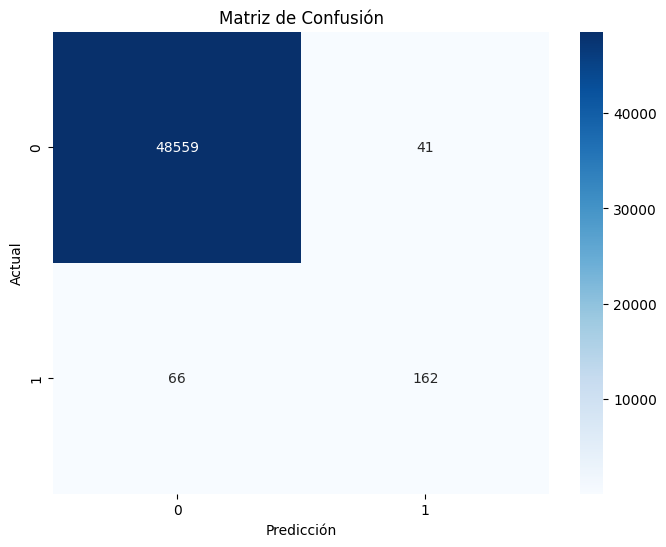

['random_forest_model_trimestre3_2020.joblib']

In [89]:
import joblib
from sklearn.metrics import roc_auc_score, recall_score, f1_score, precision_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargando el modelo
rf_classifier = joblib.load('random_forest_model_trimestre2_2020.joblib')

# Entrenando el modelo
rf_classifier.fit(X_train_res, y_train_res)

# Predeciendo probabilidades para la clase positiva
y_pred_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]

# Predeciendo clases
y_pred_rf = rf_classifier.predict(X_test)

# Calculando ROC-AUC
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
print('ROC-AUC:', roc_auc_rf)

# Gráfica de la curva ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Curva ROC (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Calculando el accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print('Accuracy:', accuracy)

# Calculando Precisión, Recall y F1-score
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print('Precisión:', precision_rf)
print('Recall:', recall_rf)
print('F1-score:', f1_rf)

# Calculando la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print('Matriz de Confusión:\n', conf_matrix)

# Graficando la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

# Guardando el modelo actualizado
joblib.dump(rf_classifier, 'random_forest_model_trimestre3_2020.joblib')

Haciendo el cuarto trimestre

Distribución de clases antes de SMOTE: {0: 168349, 1: 563}
Distribución de clases después de SMOTE: {0: 168349, 1: 33669}


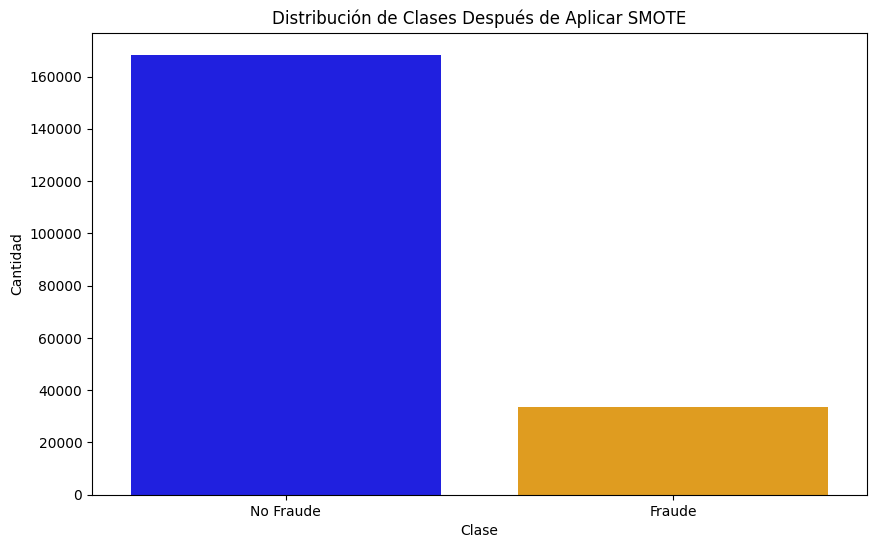

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

df_procesado['trans_date_trans_time'] = pd.to_datetime(df_procesado['trans_date_trans_time'])

# Seleccionando los datos correspondientes al cuarto trimestre del año 2019
fourth_quarter_2019_data = df_procesado[(df_procesado['trans_date_trans_time'].dt.year == 2020) & 
                                        (df_procesado['trans_date_trans_time'].dt.month >= 10) & 
                                        (df_procesado['trans_date_trans_time'].dt.month <= 12)]

# Separando características y variable objetivo
X = fourth_quarter_2019_data.drop(columns=['is_fraud', "trans_date_trans_time"])
X = X.select_dtypes(include=['float64', 'int64'])  # Seleccionando solo las columnas numéricas
y = fourth_quarter_2019_data['is_fraud']  # Variable objetivo

# Normalizando las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Divide el conjunto de datos en Train y Test
X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Divide el conjunto de entrenamiento y desarrollo (TrainDev) en Train y Dev
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, test_size=0.25, random_state=42)

# Convertir los datos a arrays NumPy
X_train, y_train = np.array(X_train), np.array(y_train)

# Contar el número de muestras en cada clase en el conjunto de entrenamiento
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))
print(f"Distribución de clases antes de SMOTE: {class_distribution}")

# Crear el objeto SMOTE con la estrategia de muestreo específica
n_minority_samples = class_distribution[1]
n_majority_samples = class_distribution[0]
desired_minority_samples = n_majority_samples // 5  # Proporción 1:5

# Crear el objeto SMOTE
sampling_strategy = {0: n_majority_samples, 1: desired_minority_samples}

smote = SMOTE(sampling_strategy=sampling_strategy)

# Ajustando y aplicando el sobremuestreo
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verificando la nueva distribución de clases
unique_res, counts_res = np.unique(y_train_res, return_counts=True)
class_distribution_res = dict(zip(unique_res, counts_res))
print(f"Distribución de clases después de SMOTE: {class_distribution_res}")

# Gráfico de barras de la variable objetivo después de SMOTE
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train_res, palette=['blue', 'orange'])
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.title('Distribución de Clases Después de Aplicar SMOTE')
plt.xticks([0, 1], ['No Fraude', 'Fraude'])
plt.show()

Redes neuronales

Epoch 1/5
790/790 [==============================] - 5s 5ms/step - loss: 0.0481 - accuracy: 0.9848 - val_loss: 0.0168 - val_accuracy: 0.9952
Epoch 2/5
790/790 [==============================] - 3s 4ms/step - loss: 0.0138 - accuracy: 0.9957 - val_loss: 0.0148 - val_accuracy: 0.9961
Epoch 3/5
790/790 [==============================] - 3s 4ms/step - loss: 0.0103 - accuracy: 0.9969 - val_loss: 0.0143 - val_accuracy: 0.9972
Epoch 4/5
790/790 [==============================] - 3s 4ms/step - loss: 0.0087 - accuracy: 0.9975 - val_loss: 0.0145 - val_accuracy: 0.9971
Epoch 5/5
1760/1760 [==============================] - 4s 2ms/step - loss: 0.0182 - accuracy: 0.9961
Test accuracy: 0.9960927367210388
1760/1760 [==============================] - 4s 2ms/step
AUC: 0.9700526296930623


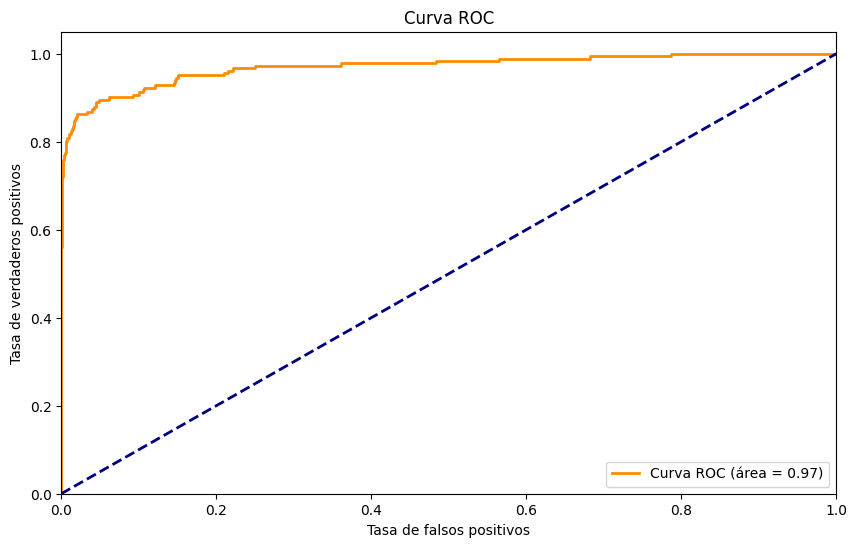

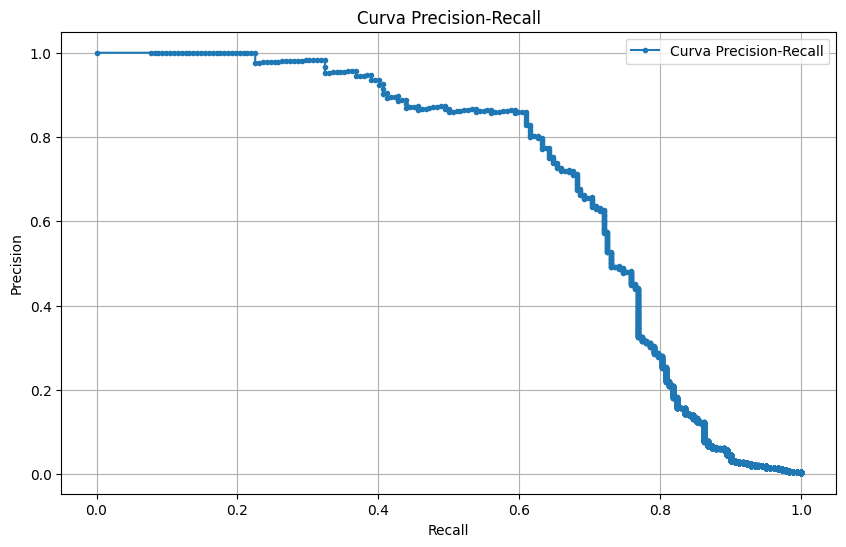

Mejor umbral: 0.9934074878692627
Mejor F1-score: 0.7138263665594856
Precisión en el mejor umbral: 0.8604651162790697
Recall en el mejor umbral: 0.6098901098901099
Precisión con umbral óptimo: 0.859375
Recall con umbral óptimo: 0.6043956043956044
F1-score con umbral óptimo: 0.7096774193548387
Matriz de Confusión:
 [[56105    18]
 [   72   110]]


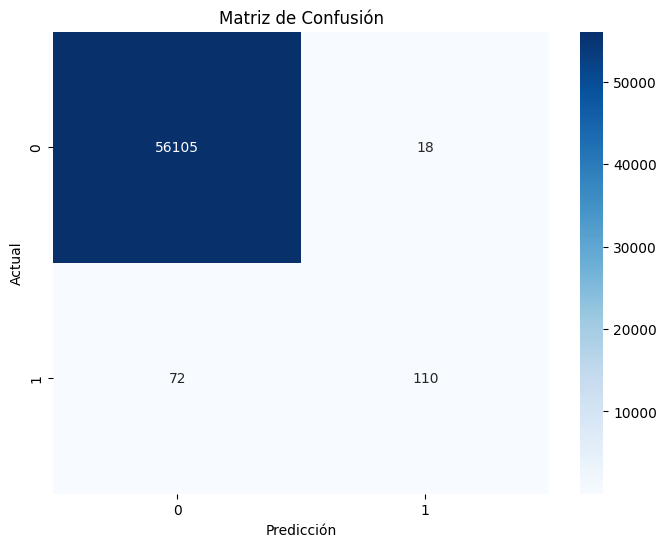

Modelo actualizado guardado en "modelo_entrenado_trimestre4_2020.h5"


c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [91]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, recall_score, f1_score, precision_score, precision_recall_curve, confusion_matrix
import seaborn as sns

# Cargando el modelo entrenado y continuando con su entrenamiento.
model = tf.keras.models.load_model('modelo_entrenado_trimestre3_2020.h5')

history = model.fit(X_train_res, y_train_res, epochs=5, batch_size=256, validation_data=(X_dev, y_dev))

# Evaluando el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Predeciendo probabilidades en el conjunto de prueba
y_pred_prob = model.predict(X_test)

# Convertiendo probabilidades en predicciones de clases usando un umbral inicial de 0.5
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculando la curva ROC, el área bajo la curva (AUC) y graficando.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Calculando y graficando la curva Precision-Recall
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label='Curva Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend()
plt.grid(True)
plt.show()

# Encontrando el umbral que maximiza el F1-score
f1_scores = 2 * (precision * recall) / (precision + recall)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds_pr[best_idx]
best_f1 = f1_scores[best_idx]
best_precision = precision[best_idx]
best_recall = recall[best_idx]

print(f'Mejor umbral: {best_threshold}')
print(f'Mejor F1-score: {best_f1}')
print(f'Precisión en el mejor umbral: {best_precision}')
print(f'Recall en el mejor umbral: {best_recall}')

# Convertiendo probabilidades en predicciones de clases usando el umbral óptimo
y_pred_optimal = (y_pred_prob > best_threshold).astype(int)

# Calcular precision, recall y F1-score con el umbral óptimo
optimal_precision = precision_score(y_test, y_pred_optimal)
optimal_recall = recall_score(y_test, y_pred_optimal)
optimal_f1 = f1_score(y_test, y_pred_optimal)

print(f'Precisión con umbral óptimo: {optimal_precision}')
print(f'Recall con umbral óptimo: {optimal_recall}')
print(f'F1-score con umbral óptimo: {optimal_f1}')

# Calculando la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_optimal)
print('Matriz de Confusión:\n', conf_matrix)

# Graficando la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

# Guardando el modelo actualizado
model.save('modelo_entrenado_trimestre4_2020.h5')
print('Modelo actualizado guardado en "modelo_entrenado_trimestre4_2020.h5"')

Random Forest

ROC-AUC: 0.9448794572674266


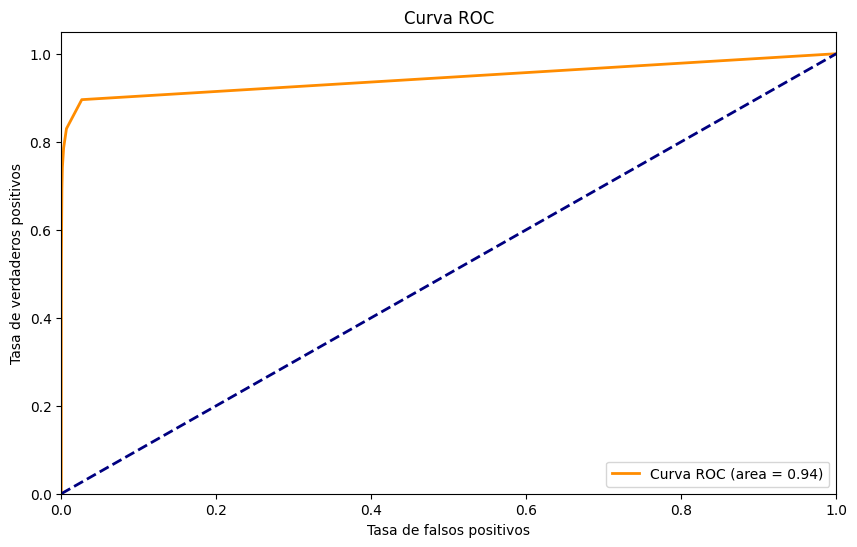

Accuracy: 0.9982772400319687
Precisión: 0.7931034482758621
Recall: 0.6318681318681318
F1-score: 0.7033639143730887
Matriz de Confusión:
 [[56093    30]
 [   67   115]]


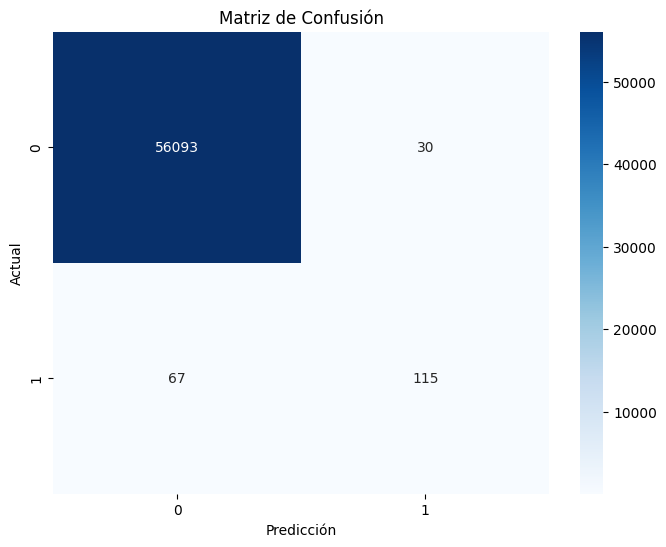

['random_forest_model_trimestre4_2020.joblib']

In [92]:
import joblib
from sklearn.metrics import roc_auc_score, recall_score, f1_score, precision_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargando el modelo
rf_classifier = joblib.load('random_forest_model_trimestre3_2020.joblib')

# Entrenando el modelo
rf_classifier.fit(X_train_res, y_train_res)

# Predeciendo probabilidades para la clase positiva
y_pred_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]

# Predeciendo clases
y_pred_rf = rf_classifier.predict(X_test)

# Calculando ROC-AUC
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
print('ROC-AUC:', roc_auc_rf)

# Gráfica de la curva ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Curva ROC (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Calculando el accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print('Accuracy:', accuracy)

# Calculando Precisión, Recall y F1-score
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print('Precisión:', precision_rf)
print('Recall:', recall_rf)
print('F1-score:', f1_rf)

# Calculando la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print('Matriz de Confusión:\n', conf_matrix)

# Graficando la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

# Guardando el modelo actualizado
joblib.dump(rf_classifier, 'random_forest_model_trimestre4_2020.joblib')

## **Sugerencias de mejoras**

**Random Forest**

Para poder mejorar los resultados del Random Forest para la detección del fraude de tarjetas de crédito, se sugiere lo siguiente: 

- Validar si el individuo (nombre y DNI) aparece o no en diferentes páginas web públicas, ya que esto los podría hacer más suceptibles a que los estafadores roben su identeidad para realizar la solicitud del servicio. Esta validación daría algunas variables sintéticas con las que se podría alimentar el modelo de detección de fraude.

- Posible mejora de los motores de reglas, para ver cuales pudiesen ser obsoletas y cuales se pueden mejorar para así poder alimentar mejor el modelo. 

- (decide4AI, 2022)

- Es importante mencionar que en algunas ocasiones, las técnicas de output flipping y class switching pueden ser beneficiosas para que el Random Forest pueda detectar el fraude de tarjetas de crédito.

- Otra observación útil sería que, para poder tener un buen rendimiento del Random Forest, se recomienda usar grandes volúmenes de datos. Lo anterior se recomienda, dado que a mayor cantidad de data, el algoritmo de Random Forest podrá rendir mejor. 

- (Hidalgo Ruiz - Capillas, 2014)

**Redes neuronales**

Para poder mejorar los resultados de las Redes Neuronales para la detección del fraude de tarjetas de crédito, se sugiere hacer esto:

- Integrar técnicas de aprendizaje profundo como Convolutional Neural Networks (CNN) y Recurrent Neural Networks (RNN) con el fin de mejorar la precisión y el rendimiento de los modelos de detección de fraudes. 

- Usar algoritmos de detección de outliers y técnicas de reducción de dimensionalidad para identificar patrones anómalos en los datos.

- Incorporar técnicas de procesamiento del lenguaje natural (NLP) para analizar y comprender mejor las descripciones y comentarios de los usuarios en las plataformas digitales.

- Usar técnicas de generación de adversarios para evaluar la robustez y la capacidad de detección de los modelos de redes neuronales profundas frente a ataques maliciosos.

- (Rataplansky, 2024)

Los mejores algoritmos para poder realizar la detección de fraude de tarjetas de crédito son los siguientes: 

- Support Vector Machine
- Random Forest
- (Ecanorea, 2023)

Otros algoritmos útiles para poder detectar el fraude en las tarjetas de crédito son los siguientes: 

- Análisis de discriminante
- Logit multinomial
- Algoritmos genéticos
- (Espinosa-Zúñiga, 2020)

Existen otras métricas para poder evaluar el rendimiento de los modelos de detección de fraude y estos pueden ser: 

- Coeficientes de Kappa
- Coeficientes Alfa
- (Espinosa-Zúñiga, 2020)

**Referencias**

- decide4AI. (2022, 3 marzo). Caso de uso - Modelo de detección de fraude de identidad. Decide. https://decidesoluciones.es/modelo-de-deteccion-de-fraude/
- https://prompt.uno/redes-neuronales-profundas/redes-neuronales-profundas-en-la-deteccion-de-fraudes/
- Ecanorea. (2023, 15 noviembre). Detección de fraudes con tarjetas de crédito mediante clasificación binaria y ML.NET. Plain Concepts. https://www.plainconcepts.com/es/deteccion-fraude-tarjeta-credito-clasificacion-binaria-mlnet/
- Espinosa-Zúñiga, J. J. (2020). Aplicación de algoritmos Random Forest y XGBoost en una base de solicitudes de tarjetas de crédito. IngenieríA, InvestigacióN y TecnologíA, 21(3), 1-16. https://doi.org/10.22201/fi.25940732e.2020.21.3.022
- Hidalgo Ruiz - Capillas, S. (2014). Random Forests para detecci´on de fraude en medios de pago. En Repositorio UAM.